In [2]:
import pandas as pd

# Replace this with the path to your JSON file
file_path = 'business.json'

# Load the data
df = pd.read_json(file_path, lines=True)

In [3]:
df.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [4]:
# Number of rows before filtering
rows_before = df.shape[0]
print("Number of rows before filtering:", rows_before)

# Filter rows where 'categories' contains 'restaurant' or 'Restaurant'
df_filtered = df[df['categories'].str.contains('restaurant|Restaurant', na=False)]

# Further filter for 'breakfast' or 'brunch' (case insensitive)
df_filtered = df_filtered[df_filtered['categories'].str.contains('breakfast|brunch', case=False, na=False)]

# Number of rows after filtering
rows_after = df_filtered.shape[0]
print("Number of rows after filtering:", rows_after)


Number of rows before filtering: 150346
Number of rows after filtering: 6265


In [5]:
df_filtered.head()

business_id                   name                address  \
12   il_Ro8jwPlHresjw9EGmBg                Denny's           8901 US 31 S   
47   lk9IwjZXqUMqqOhM774DtQ       Caviar & Bananas          2031 Broadway   
85   IDtLPgUrqorrpqSLdfMhZQ   Helena Avenue Bakery  131 Anacapa St, Ste C   
206  IYlUaKC9nICjiWdk-ShPlg             Bub's Cafe          220 2nd St SW   
235  bTve2mwLk5Zc01vRKqc2KQ  Red Hook Coffee & Tea           765 S 4th St   

              city state postal_code   latitude   longitude  stars  \
12    Indianapolis    IN       46227  39.637133  -86.127217    2.5   
47       Nashville    TN       37203  36.148371  -86.798895    3.5   
85   Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
206         Carmel    IN       46032  39.976614  -86.130124    4.0   
235   Philadelphia    PA       19147  39.938552  -75.149636    4.5   

     review_count  is_open                                         attributes  \
12             28        1  {'RestaurantsReservations': 'False', 'Restaura...   
47            159        0  {'RestaurantsTakeOut': 'True', 'RestaurantsRes...   
85            389        1  {'RestaurantsTakeOut': 'True', 'NoiseLevel': '...   
206           175        0  {'RestaurantsReservations': 'False', 'Business...   
235           183        1  {'BikeParking': 'True', 'OutdoorSeating': 'Tru...   

                                            categories  \
12   American (Traditional), Restaurants, Diners, B...   
47   Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...   
85   Food, Restaurants, Salad, Coffee & Tea, Breakf...   
206                    Restaurants, Breakfast & Brunch   
235  Restaurants, Breakfast & Brunch, Vegan, Bagels...   

                                                 hours  
12   {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...  
47   {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  
85   {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...  
206  {'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...  
235  {'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...

In [5]:
import folium
from folium.plugins import HeatMap
import numpy as np

# First, aggregate the data
grouped = df_filtered.groupby(['latitude', 'longitude']).agg({'stars': np.mean}).reset_index()

# Create a map centered around a central point
# You might want to adjust this location to be more central to your data
map_center = [grouped['latitude'].mean(), grouped['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add the heat map
HeatMap(grouped[['latitude', 'longitude', 'stars']].values.tolist(), radius=15).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')

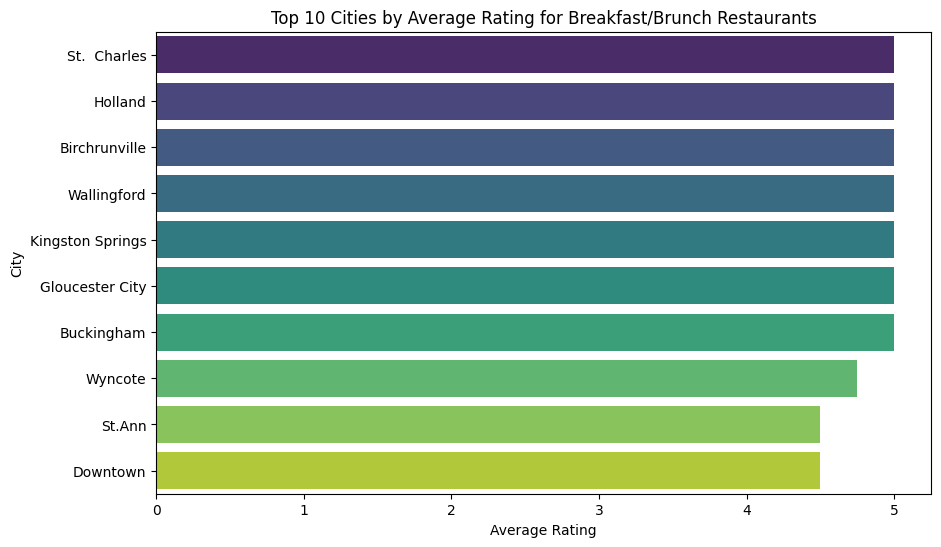

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average stars per city
city_avg_ratings = df_filtered.groupby('city')['stars'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_avg_ratings.values, y=city_avg_ratings.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.title('Top 10 Cities by Average Rating for Breakfast/Brunch Restaurants')
plt.show()

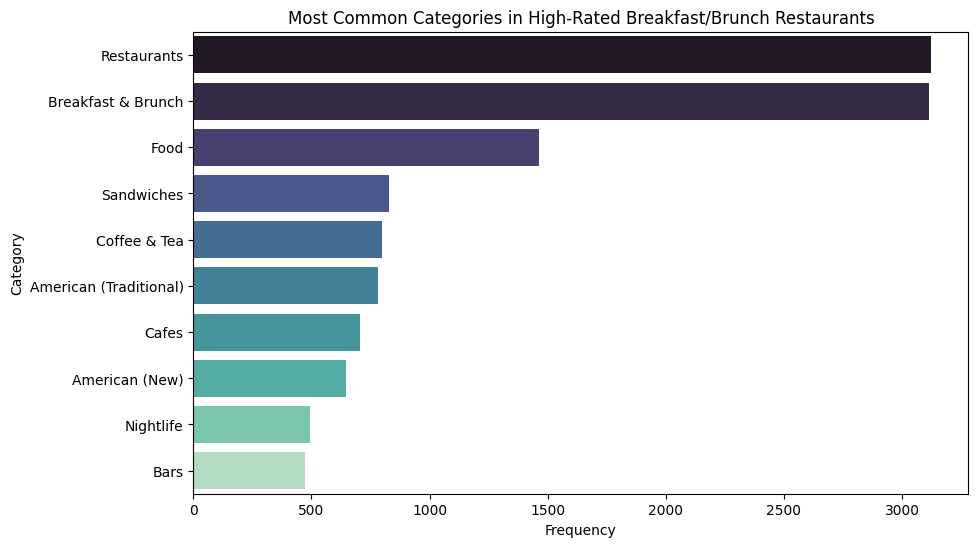

In [7]:
# Filter high-rated restaurants
high_rated = df_filtered[df_filtered['stars'] >= 4]

# Extract categories and count frequency
categories = high_rated['categories'].str.split(', ').explode().value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories.values, y=categories.index, palette='mako')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Most Common Categories in High-Rated Breakfast/Brunch Restaurants')
plt.show()

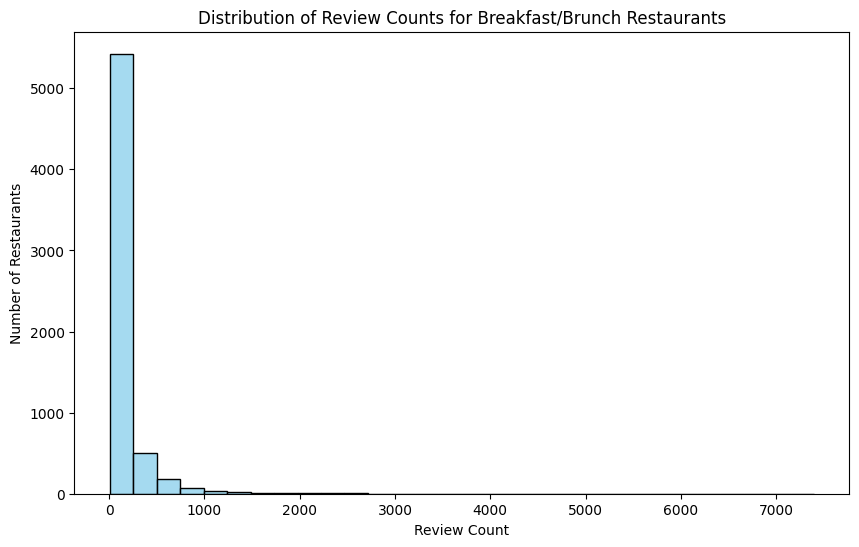

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['review_count'], bins=30, color='skyblue')
plt.xlabel('Review Count')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Review Counts for Breakfast/Brunch Restaurants')
plt.show()

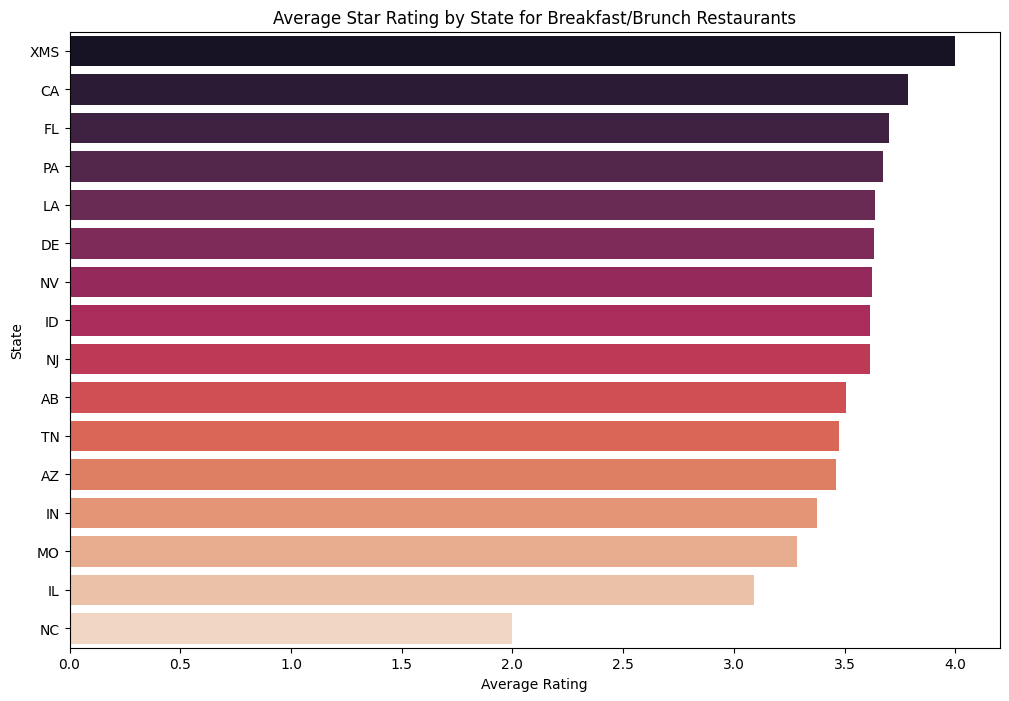

In [9]:
# Calculate average stars per state
state_avg_ratings = df_filtered.groupby('state')['stars'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=state_avg_ratings.values, y=state_avg_ratings.index, palette='rocket')
plt.xlabel('Average Rating')
plt.ylabel('State')
plt.title('Average Star Rating by State for Breakfast/Brunch Restaurants')
plt.show()

C:\Users\The boss\AppData\Local\Temp\ipykernel_10136\413997913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


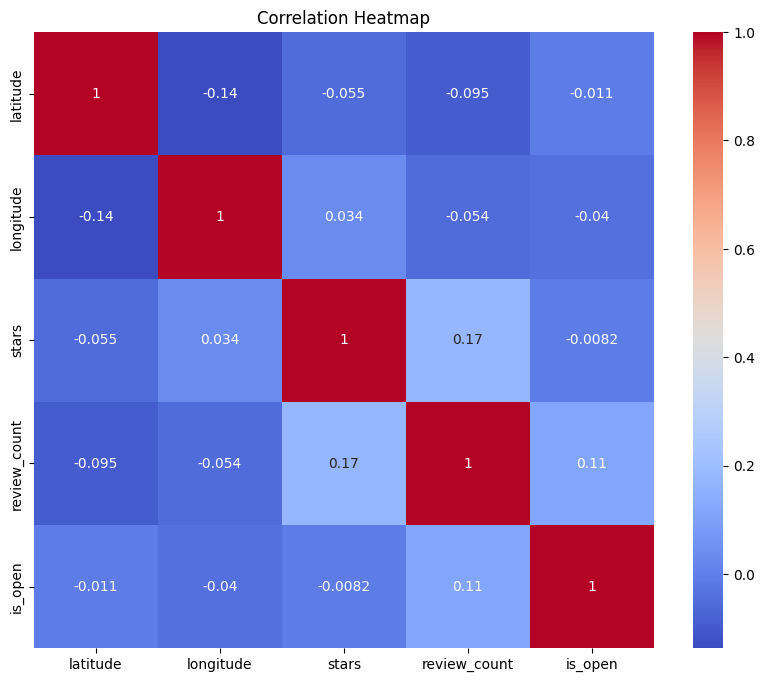

In [10]:
# Assuming you have a DataFrame with numerical features
correlation_matrix = df_filtered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
file_path = 'review.json'  # Replace with your file path

# Open the file
with open(file_path, 'r') as file:
    for i in range(5):
        print(file.readline())

{"review_id":"KU_O5udG6zpxOg-VcAEodg","user_id":"mh_-eMZ6K5RLWhZyISBhwA","business_id":"XQfwVwDr-v0ZS3_CbbE5Xw","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.","date":"2018-07-07 22:09:11"}

{"review_id":"BiTunyQ73aT9WBnpR9DZGw","user_id":"OyoGAe7OKpv6SyGZT5g77Q","business_id":"7ATYjTIgM3jUlt4UM3IypQ","stars":5.0,"useful":1,"funny":0,"cool":1,"text":"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space a

In [7]:
import pandas as pd
import json

# Path to the reviews JSON file
reviews_file_path = 'review.json'

# Get the list of business IDs from df_filtered
business_ids = set(df_filtered['business_id'])

# Initialize an empty list to store the matching review records
filtered_reviews = []

# Open the reviews file with UTF-8 encoding and read line by line
with open(reviews_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        review = json.loads(line)
        if review['business_id'] in business_ids:
            filtered_reviews.append(review)

# Convert the list of reviews to a DataFrame
reviews_df = pd.DataFrame(filtered_reviews)

# Display the first few rows of the DataFrame
print(reviews_df.head())

KeyboardInterrupt: 

In [17]:
# Merging df_filtered with reviews_df on 'business_id'
merged_df = pd.merge(reviews_df, df_filtered, on='business_id', how='left')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
2  l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A  EQ-TZ2eeD_E0BHuvoaeG5Q   
3  UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
4  OAhBYw8IQ6wlfw1owXWRWw  1C2lxzUo1Hyye4RFIXly3g  BVndHaLihEYbr76Z0CMEGw   

   stars_x  useful  funny  cool  \
0      3.0       0      0     0   
1      3.0       0      0     0   
2      4.0       0      0     0   
3      4.0       0      2     0   
4      5.0       0      0     0   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
2  Locals recommended Milktooth, and it's an amaz...  2015-08-19 14:31:45   
3  The bun makes t

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews based on rating
highly_rated_reviews = ' '.join(merged_df[merged_df['stars_x'] >= 4]['text'])
low_rated_reviews = ' '.join(merged_df[merged_df['stars_x'] <= 2]['text'])

# Generate word clouds
wordcloud_high = WordCloud(background_color='white').generate(highly_rated_reviews)
wordcloud_low = WordCloud(background_color='white').generate(low_rated_reviews)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Highly Rated Reviews')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Low Rated Reviews')
plt.show()

KeyboardInterrupt: 

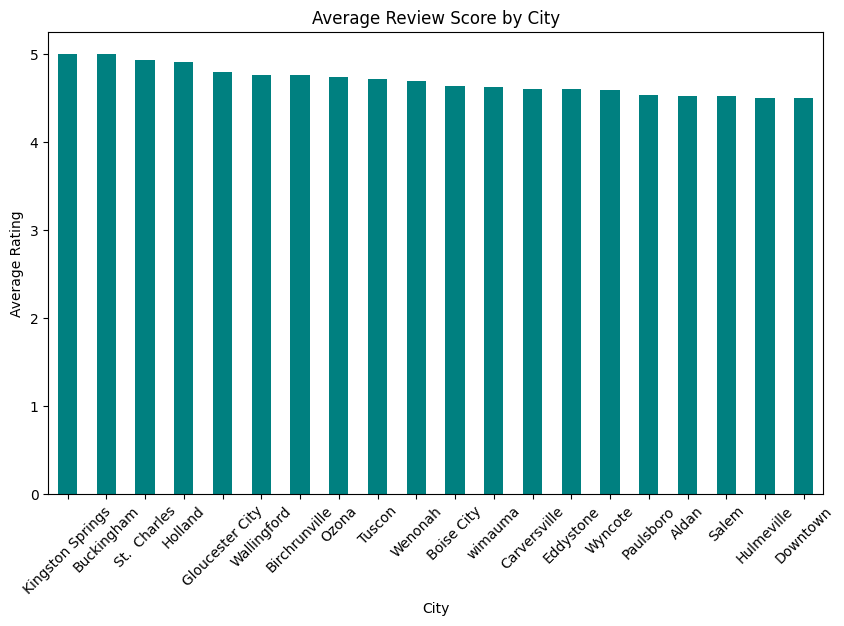

In [21]:
city_avg_rating = merged_df.groupby('city')['stars_x'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
city_avg_rating.plot(kind='bar', color='teal')
plt.title('Average Review Score by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

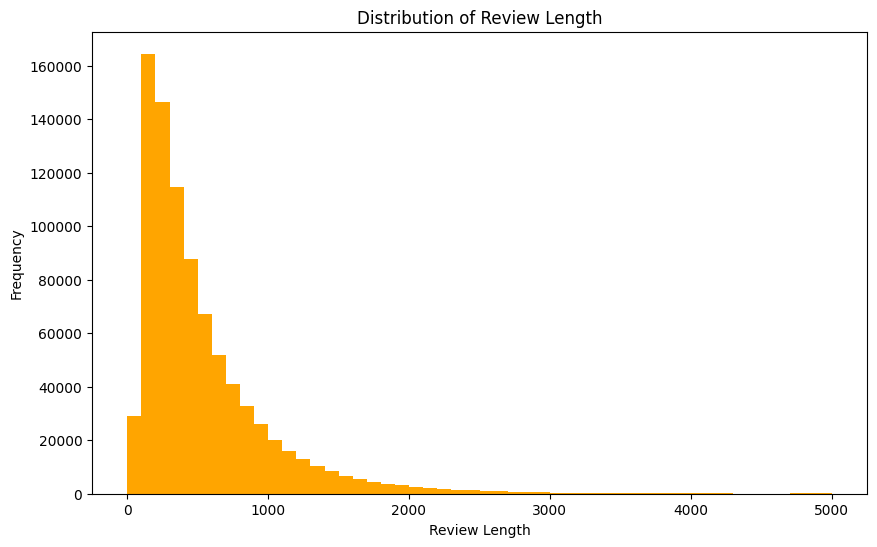

In [22]:
merged_df['review_length'] = merged_df['text'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(merged_df['review_length'], bins=50, color='orange')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

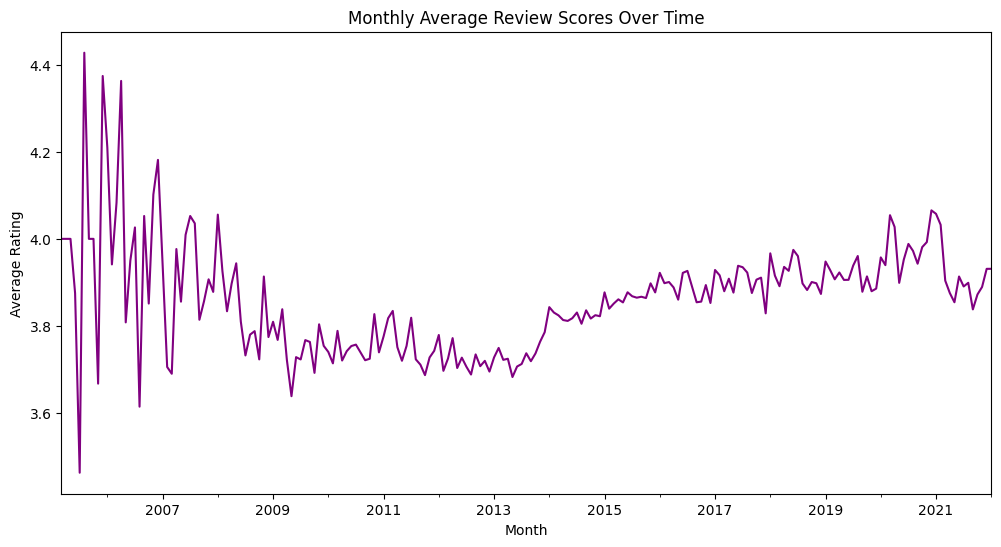

In [23]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
monthly_reviews = merged_df.set_index('date').resample('M')['stars_x'].mean()

plt.figure(figsize=(12, 6))
monthly_reviews.plot(color='purple')
plt.title('Monthly Average Review Scores Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

ValueError: num must be an integer with 1 <= num <= 15, not 16

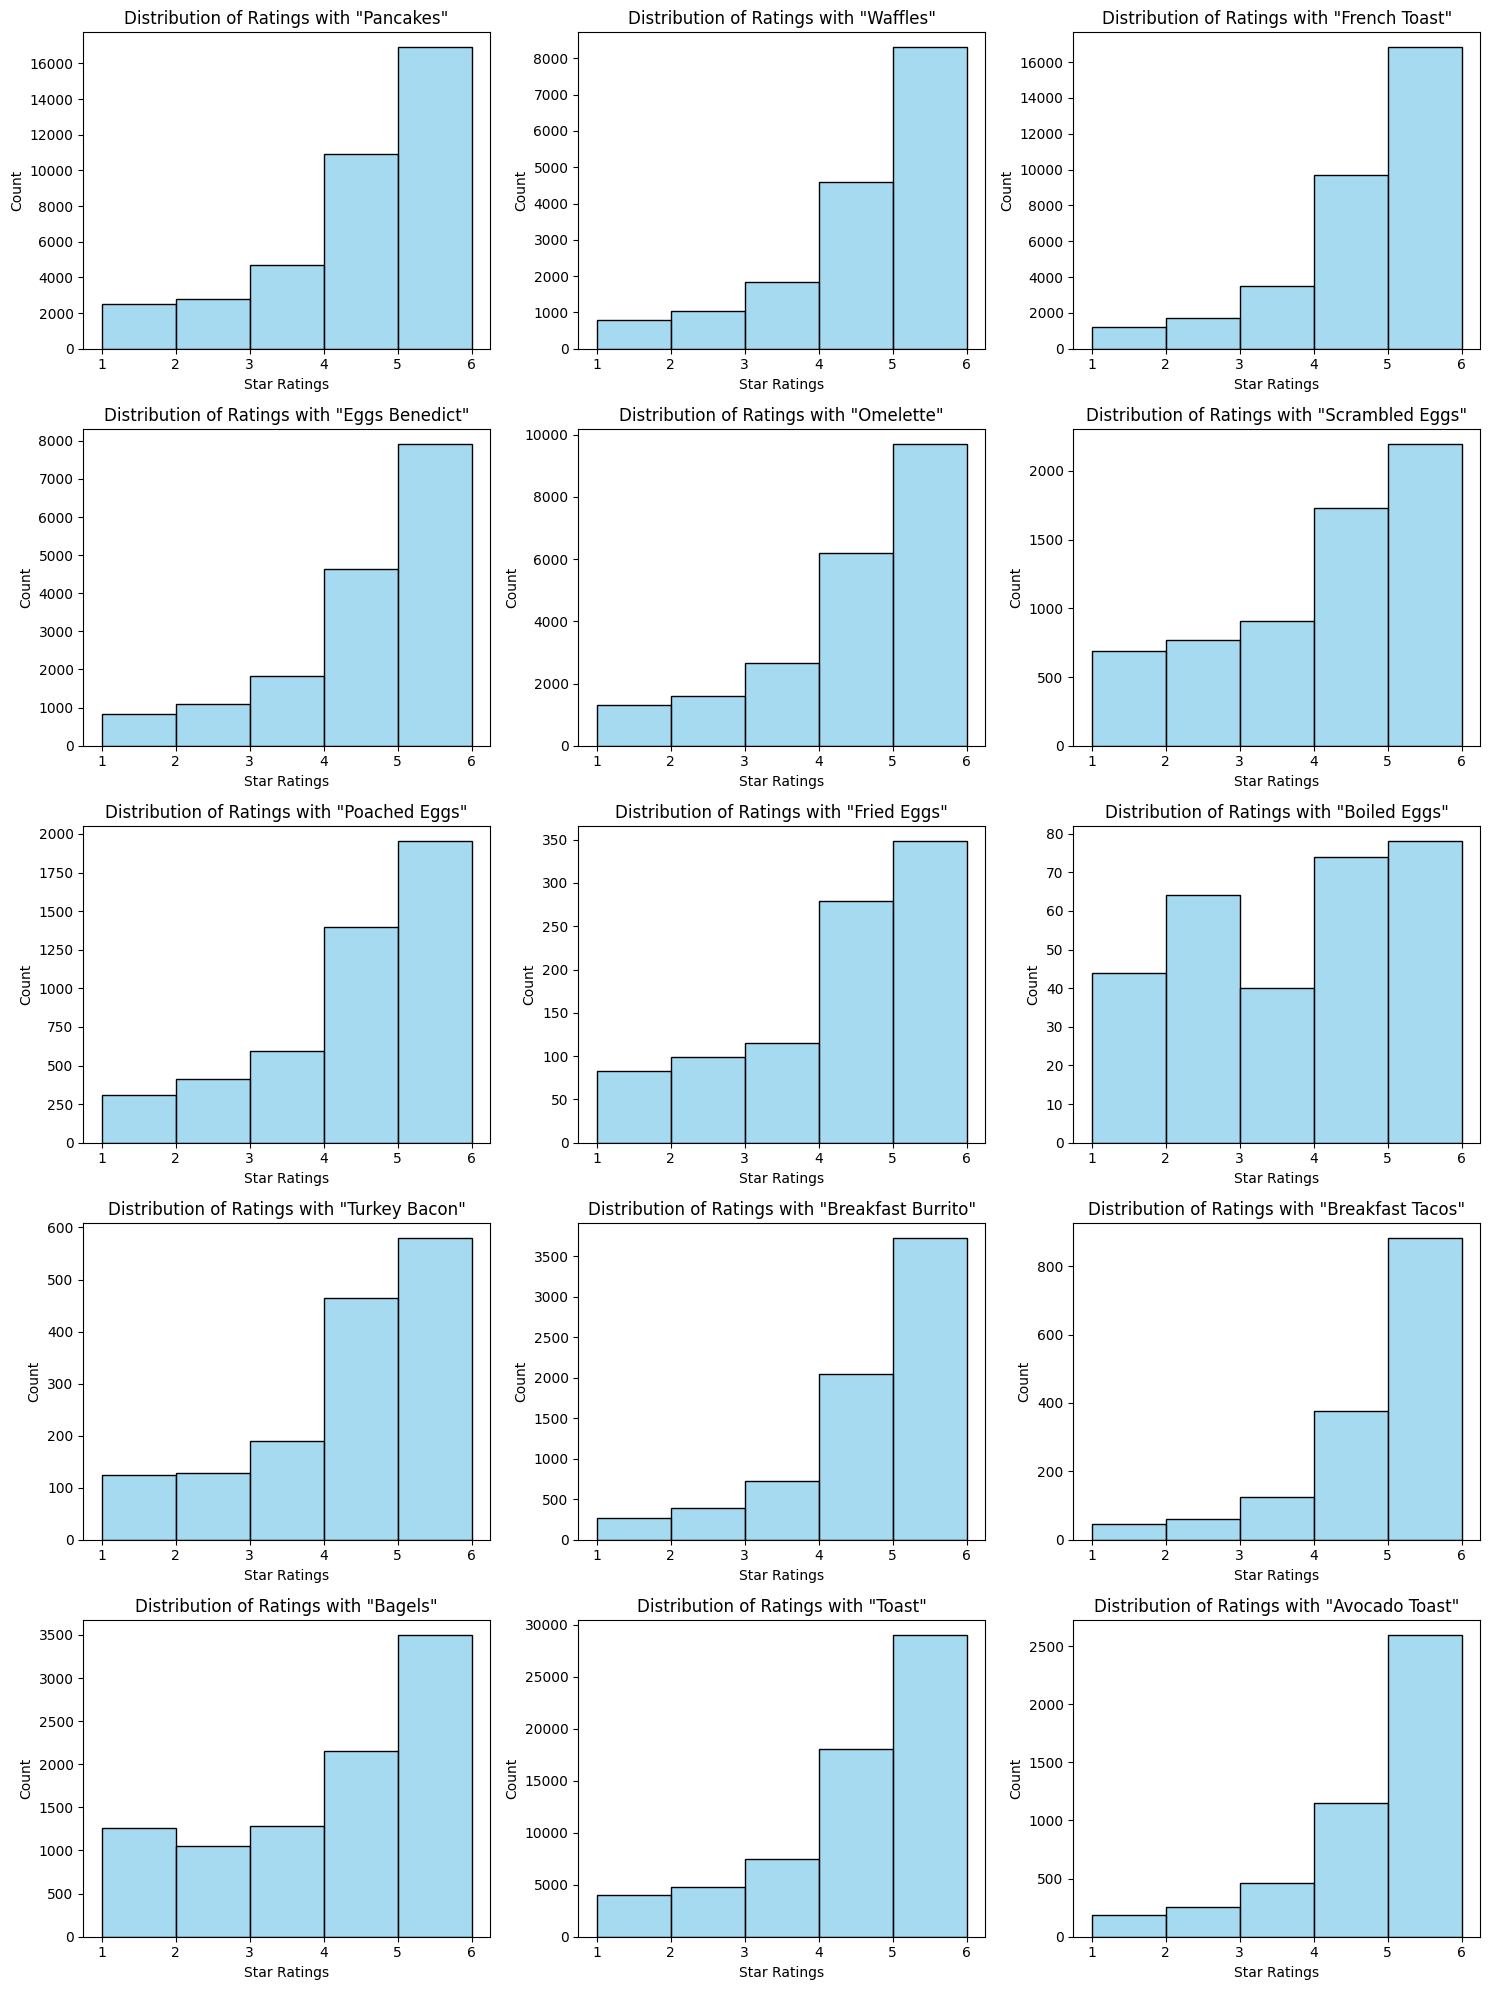

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of words to analyze
words = [
    "Pancakes", "Waffles", "French Toast", "Eggs Benedict", "Omelette",
    "Scrambled Eggs", "Poached Eggs", "Fried Eggs", "Boiled Eggs", "Turkey Bacon",
    "Breakfast Burrito", "Breakfast Tacos", "Bagels", "Toast", "Avocado Toast",
    "Granola", "Yogurt Parfait", "Fruit Salad", "Smoothie Bowl", "Acai Bowl",
    "Porridge", "Oatmeal", "Grits", "Corned Beef Hash", "Biscuits and Gravy",
    "Huevos Rancheros", "Bacon", "Ham", "Sausage", "Fried Chicken",
    "Fries", "Hash Browns", "Breakfast Sandwich", "Croissant", "Danish Pastry",
    "Cinnamon Roll", "Scones", "Muffins", "Coffee Cake", "Crepes"
]
# Create a figure and axes for the subplots
plt.figure(figsize=(15, 20))

# Loop through each word and create a subplot
for i, word in enumerate(words):
    # Filter reviews containing the word
    word_reviews = merged_df[merged_df['text'].str.contains(word, case=False, na=False)]

    # Create a subplot
    plt.subplot(5, 3, i+1)
    sns.histplot(word_reviews['stars_x'], bins=[1, 2, 3, 4, 5, 6], kde=False, color='skyblue')
    plt.title(f'Distribution of Ratings with "{word}"')
    plt.xlabel('Star Ratings')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

In [ ]:
from collections import Counter
import re

# Function to clean and split text into words
def clean_and_split_text(text):
    # Remove non-alphabetic characters and split into words
    words = re.sub("[^a-zA-Z]", " ", text).lower().split()
    return words

# Split the DataFrame
high_ratings = merged_df[merged_df['stars_x'] >= 4]
low_ratings = merged_df[merged_df['stars_x'] <= 2]

# Get the most frequent words for high and low ratings
high_freq_words = Counter(" ".join(high_ratings['text'].dropna().apply(clean_and_split_text).sum()).split()).most_common(15)
low_freq_words = Counter(" ".join(low_ratings['text'].dropna().apply(clean_and_split_text).sum()).split()).most_common(15)

# Extract just the words, not their counts
high_words = [word for word, freq in high_freq_words]
low_words = [word for word, freq in low_freq_words]

In [ ]:
all_freq_words = Counter(" ".join(merged_df['text'].dropna().apply(clean_and_split_text).sum()).split()).most_common(15)
all_words = [word for word, freq in all_freq_words]

In [ ]:
def create_histograms(words, title):
    plt.figure(figsize=(15, 20))
    for i, word in enumerate(words):
        word_reviews = merged_df[merged_df['text'].str.contains(word, case=False, na=False)]
        plt.subplot(5, 3, i+1)
        sns.histplot(word_reviews['stars_x'], bins=[1, 2, 3, 4, 5, 6], kde=False, color='skyblue')
        plt.title(f'Distribution with "{word}"')
        plt.xlabel('Star Ratings')
        plt.ylabel('Count')
        plt.tight_layout()
    plt.suptitle(title)
    plt.show()

# Create histograms for each set of words
create_histograms(high_words, 'Words Most Associated with Highest Reviews')
create_histograms(low_words, 'Words Most Associated with Lowest Reviews')
create_histograms(all_words, '15 Most Frequently Used Words')

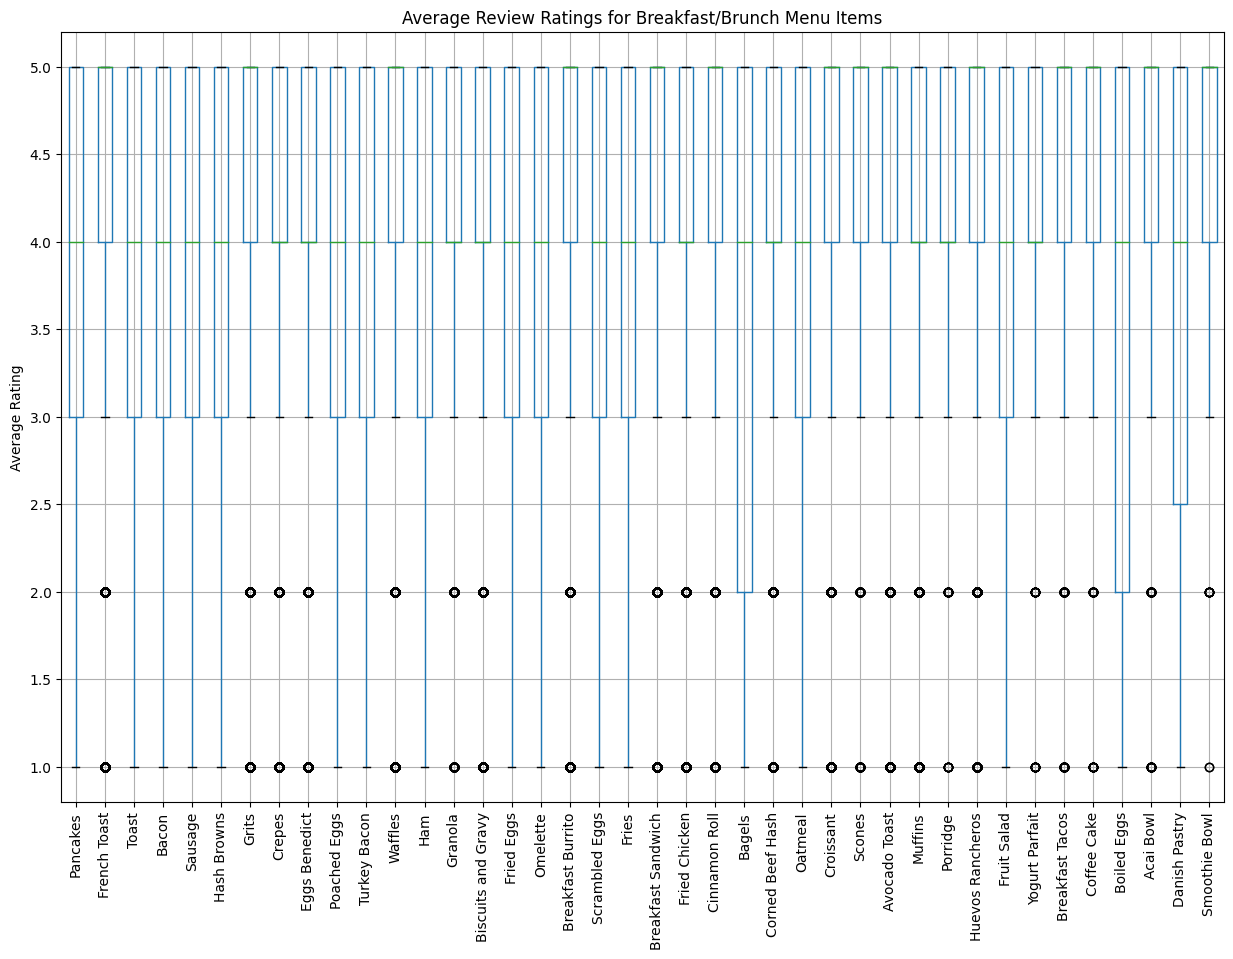

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of menu items
menu_items = [
    "Pancakes", "Waffles", "French Toast", "Eggs Benedict", "Omelette",
    "Scrambled Eggs", "Poached Eggs", "Fried Eggs", "Boiled Eggs", "Turkey Bacon",
    "Breakfast Burrito", "Breakfast Tacos", "Bagels", "Toast", "Avocado Toast",
    "Granola", "Yogurt Parfait", "Fruit Salad", "Smoothie Bowl", "Acai Bowl",
    "Porridge", "Oatmeal", "Grits", "Corned Beef Hash", "Biscuits and Gravy",
    "Huevos Rancheros", "Bacon", "Ham", "Sausage", "Fried Chicken",
    "Fries", "Hash Browns", "Breakfast Sandwich", "Croissant", "Danish Pastry",
    "Cinnamon Roll", "Scones", "Muffins", "Coffee Cake", "Crepes"
]

# Prepare data for plotting
data_for_plotting = {}

for item in menu_items:
    filtered_reviews = merged_df[merged_df['text'].str.contains(item, case=False, na=False)]
    data_for_plotting[item] = filtered_reviews['stars_x']

# Convert to DataFrame
ratings_df = pd.DataFrame.from_dict(data_for_plotting, orient='index').transpose()

# Plot
plt.figure(figsize=(15, 10))
ratings_df.boxplot(rot=90)
plt.title('Average Review Ratings for Breakfast/Brunch Menu Items')
plt.ylabel('Average Rating')
plt.show()


In [19]:
import pandas as pd

# Initialize a dictionary to store the data
menu_item_stats = {'Menu Item': [], 'Average Rating': [], 'Positive Mentions': [], 'Negative Mentions': []}

for item in menu_items:
    # Filter reviews mentioning the item
    item_reviews = merged_df[merged_df['text'].str.contains(item, case=False, na=False)]
    
    # Calculate average rating
    average_rating = item_reviews['stars_x'].mean()

    # Count positive and negative mentions
    positive_mentions = item_reviews[item_reviews['stars_x'] > 3].shape[0]
    negative_mentions = item_reviews[item_reviews['stars_x'] < 3].shape[0]

    # Add data to the dictionary
    menu_item_stats['Menu Item'].append(item)
    menu_item_stats['Average Rating'].append(average_rating)
    menu_item_stats['Positive Mentions'].append(positive_mentions)
    menu_item_stats['Negative Mentions'].append(negative_mentions)

# Convert the dictionary to a DataFrame
menu_item_stats_df = pd.DataFrame(menu_item_stats)

# Display the DataFrame
print(menu_item_stats_df.head())

       Menu Item  Average Rating  Positive Mentions  Negative Mentions
0       Pancakes        3.976557              27818               5299
1        Waffles        4.124047              12886               1821
2   French Toast        4.193055              26525               2892
3  Eggs Benedict        4.083931              12548               1936
4       Omelette        3.997994              15894               2886


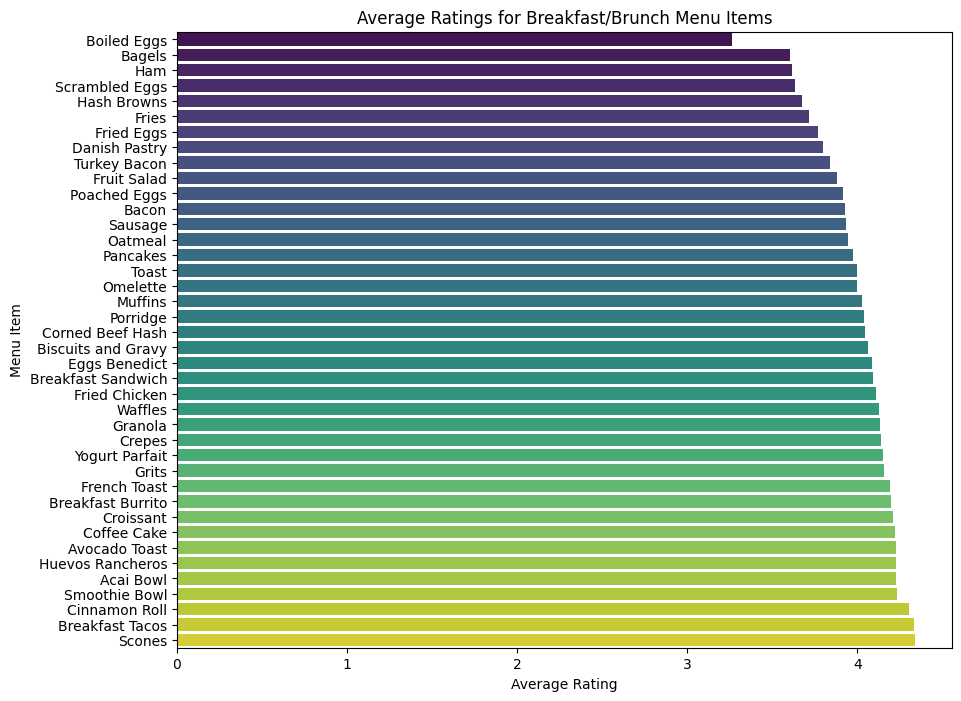

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by average rating
avg_rating_sorted_df = menu_item_stats_df.sort_values('Average Rating')

plt.figure(figsize=(10, 8))
sns.barplot(x='Average Rating', y='Menu Item', data=avg_rating_sorted_df, palette='viridis')
plt.title('Average Ratings for Breakfast/Brunch Menu Items')
plt.xlabel('Average Rating')
plt.ylabel('Menu Item')
plt.show()

In [25]:
import plotly.express as px

fig = px.treemap(avg_rating_sorted_df, path=['Menu Item'], values='Average Rating',
                 color='Average Rating', color_continuous_scale='viridis')
fig.update_layout(title='Average Ratings for Breakfast/Brunch Menu Items')
fig.show()

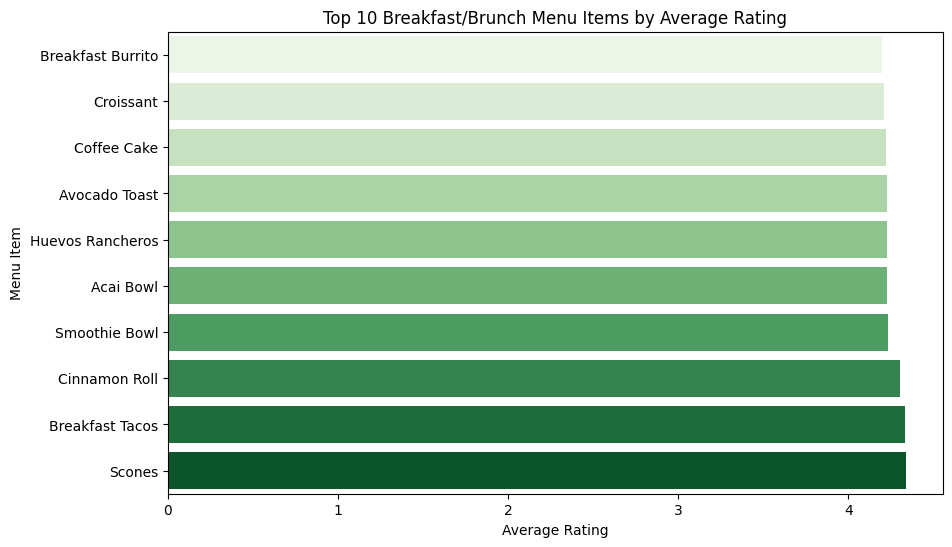

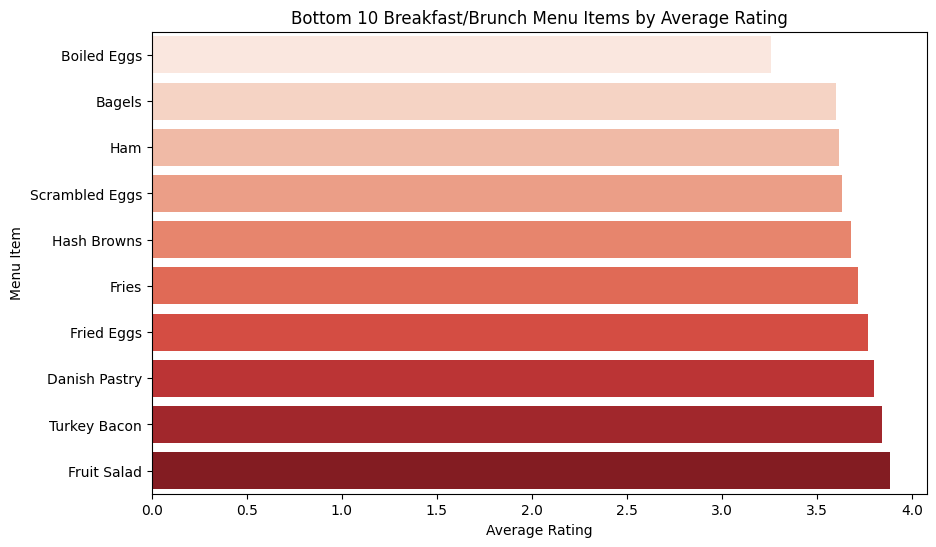

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of items to display
num_items = 10

# Sort by average rating
avg_rating_sorted_df = menu_item_stats_df.sort_values('Average Rating')

# Split into top and bottom items
top_items = avg_rating_sorted_df.tail(num_items)  # Top rated items
bottom_items = avg_rating_sorted_df.head(num_items)  # Bottom rated items

# Plot for Top Rated Items
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rating', y='Menu Item', data=top_items, palette='Greens')
plt.title('Top 10 Breakfast/Brunch Menu Items by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Menu Item')
plt.show()

# Plot for Bottom Rated Items
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rating', y='Menu Item', data=bottom_items, palette='Reds')
plt.title('Bottom 10 Breakfast/Brunch Menu Items by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Menu Item')
plt.show()

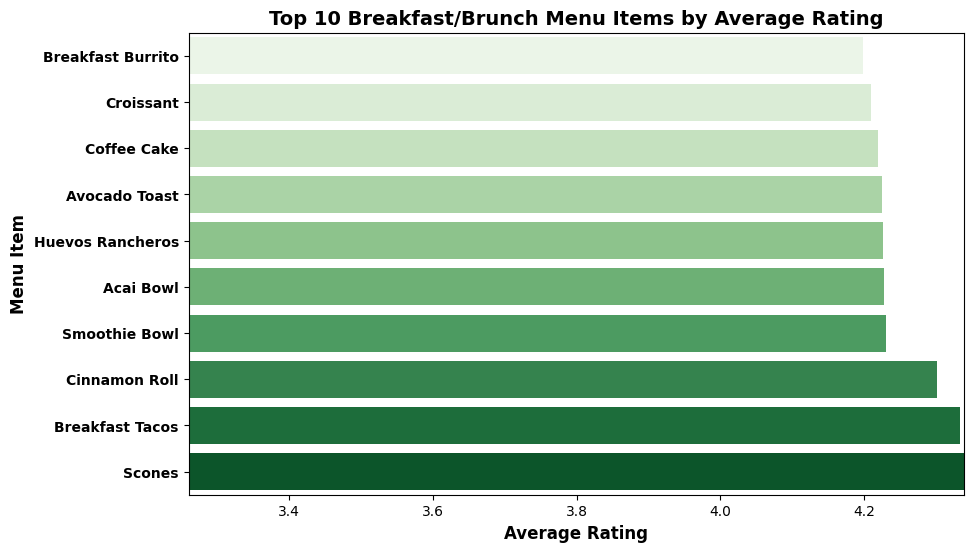

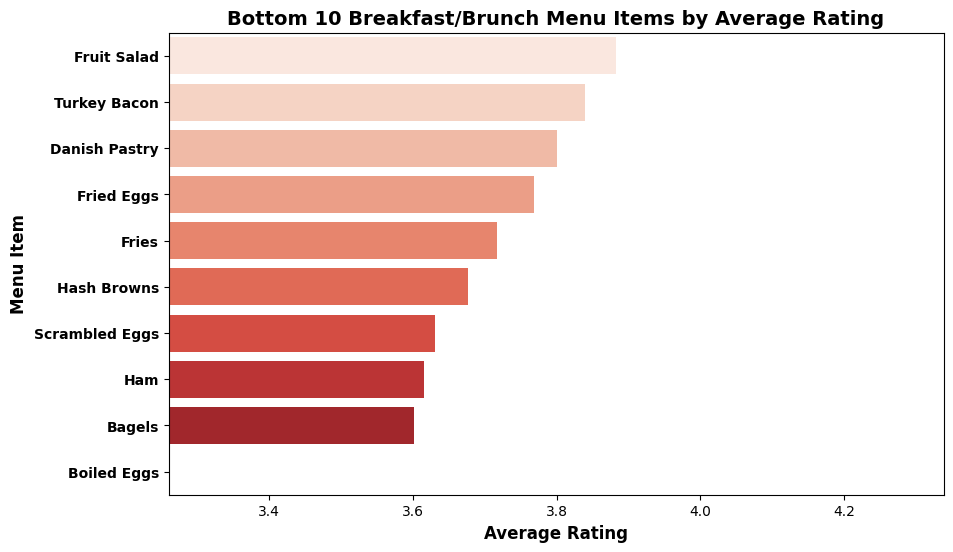

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of items to display
num_items = 10

# Sort by average rating
avg_rating_sorted_df = menu_item_stats_df.sort_values('Average Rating')

# Split into top and bottom items
top_items = avg_rating_sorted_df.tail(num_items)  # Top rated items
bottom_items = avg_rating_sorted_df.head(num_items)  # Bottom rated items

# Determine common x-axis limits
x_min = min(top_items['Average Rating'].min(), bottom_items['Average Rating'].min())
x_max = max(top_items['Average Rating'].max(), bottom_items['Average Rating'].max())

# Plot for Top Rated Items
plt.figure(figsize=(10, 6))
top_plot = sns.barplot(x='Average Rating', y='Menu Item', data=top_items, palette='Greens')
plt.title('Top 10 Breakfast/Brunch Menu Items by Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.xlim(x_min, x_max)
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

# Plot for Bottom Rated Items - Inverted
plt.figure(figsize=(10, 6))
bottom_plot = sns.barplot(x='Average Rating', y='Menu Item', data=bottom_items.iloc[::-1], palette='Reds')  # Reverse the order
plt.title('Bottom 10 Breakfast/Brunch Menu Items by Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.xlim(x_min, x_max)
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


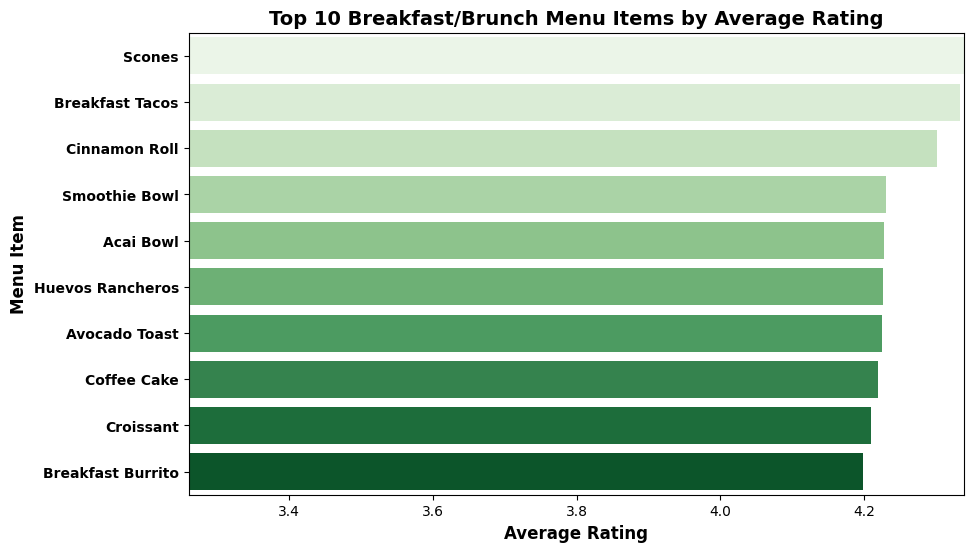

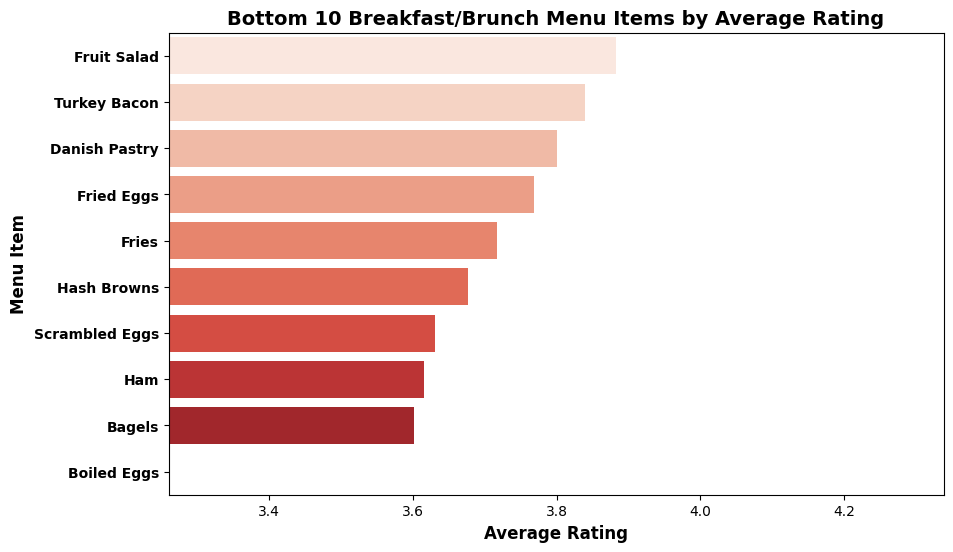

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of items to display
num_items = 10

# Sort by average rating
avg_rating_sorted_df = menu_item_stats_df.sort_values('Average Rating')

# Split into top and bottom items
top_items = avg_rating_sorted_df.tail(num_items)  # Top rated items
bottom_items = avg_rating_sorted_df.head(num_items)  # Bottom rated items

# Determine common x-axis limits
x_min = min(top_items['Average Rating'].min(), bottom_items['Average Rating'].min())
x_max = max(top_items['Average Rating'].max(), bottom_items['Average Rating'].max())

# Plot for Top Rated Items - Inverted
plt.figure(figsize=(10, 6))
top_plot = sns.barplot(x='Average Rating', y='Menu Item', data=top_items.iloc[::-1], palette='Greens')  # Reverse the order
plt.title('Top 10 Breakfast/Brunch Menu Items by Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.xlim(x_min, x_max)
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

# Plot for Bottom Rated Items - Inverted
plt.figure(figsize=(10, 6))
bottom_plot = sns.barplot(x='Average Rating', y='Menu Item', data=bottom_items.iloc[::-1], palette='Reds')  # Reverse the order
plt.title('Bottom 10 Breakfast/Brunch Menu Items by Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.xlim(x_min, x_max)
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


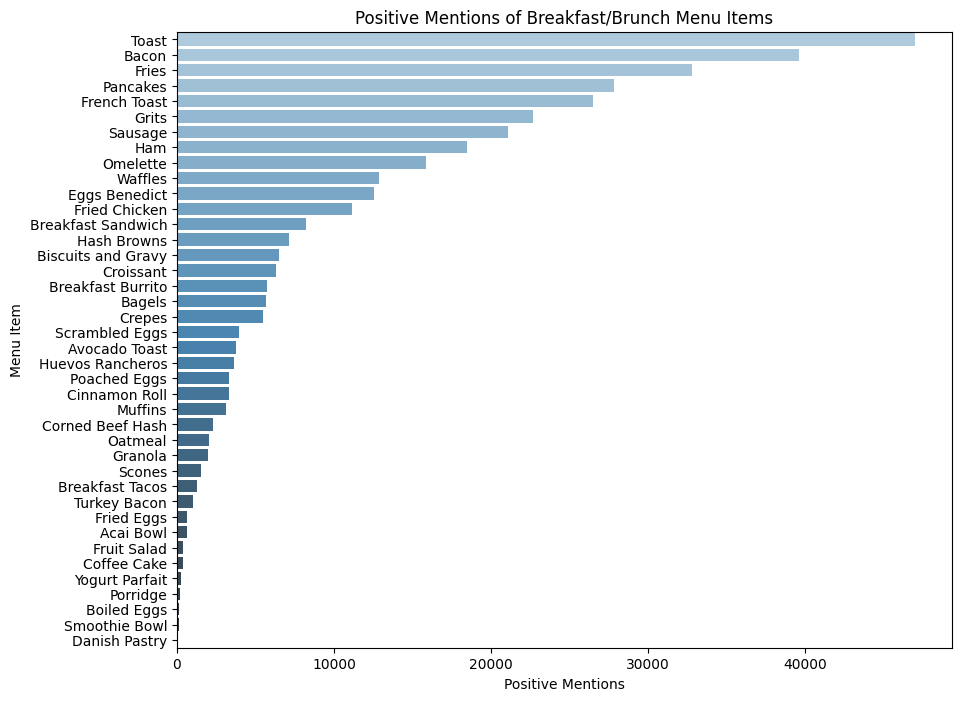

In [21]:
# Sort by positive mentions
positive_sorted_df = menu_item_stats_df.sort_values('Positive Mentions', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Positive Mentions', y='Menu Item', data=positive_sorted_df, palette='Blues_d')
plt.title('Positive Mentions of Breakfast/Brunch Menu Items')
plt.xlabel('Positive Mentions')
plt.ylabel('Menu Item')
plt.show()

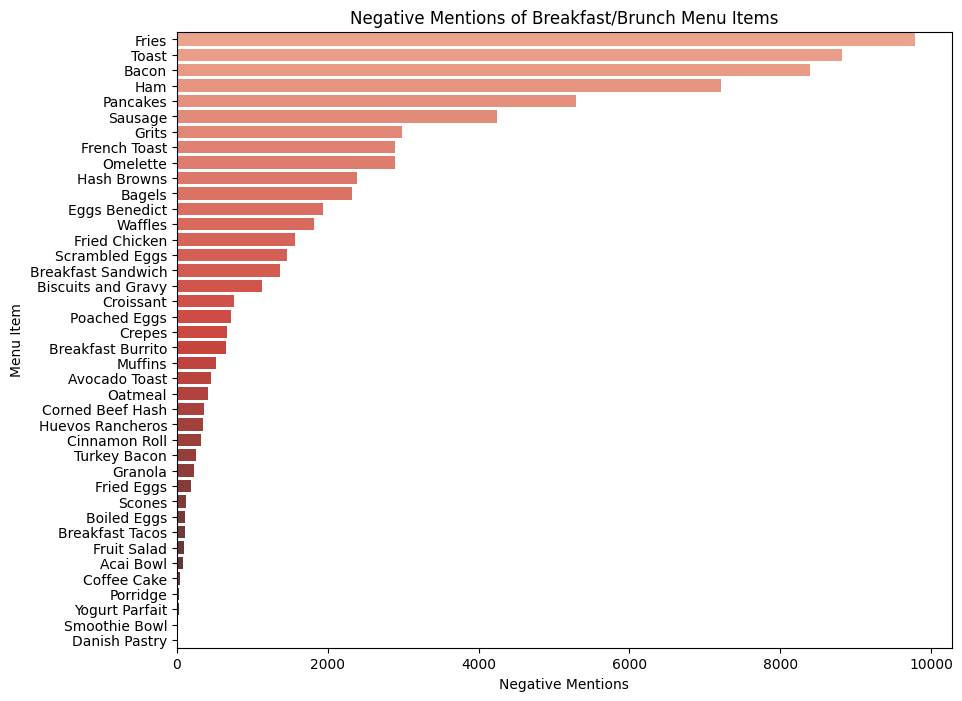

In [22]:
# Sort by negative mentions
negative_sorted_df = menu_item_stats_df.sort_values('Negative Mentions', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Negative Mentions', y='Menu Item', data=negative_sorted_df, palette='Reds_d')
plt.title('Negative Mentions of Breakfast/Brunch Menu Items')
plt.xlabel('Negative Mentions')
plt.ylabel('Menu Item')
plt.show()

In [59]:
# Assuming 'Positive Mentions' and 'Negative Mentions' are columns in your DataFrame
menu_item_stats_df['Total Mentions'] = menu_item_stats_df['Positive Mentions'] + menu_item_stats_df['Negative Mentions']
menu_item_stats_df['Percent Positive'] = (menu_item_stats_df['Positive Mentions'] / menu_item_stats_df['Total Mentions']) * 100


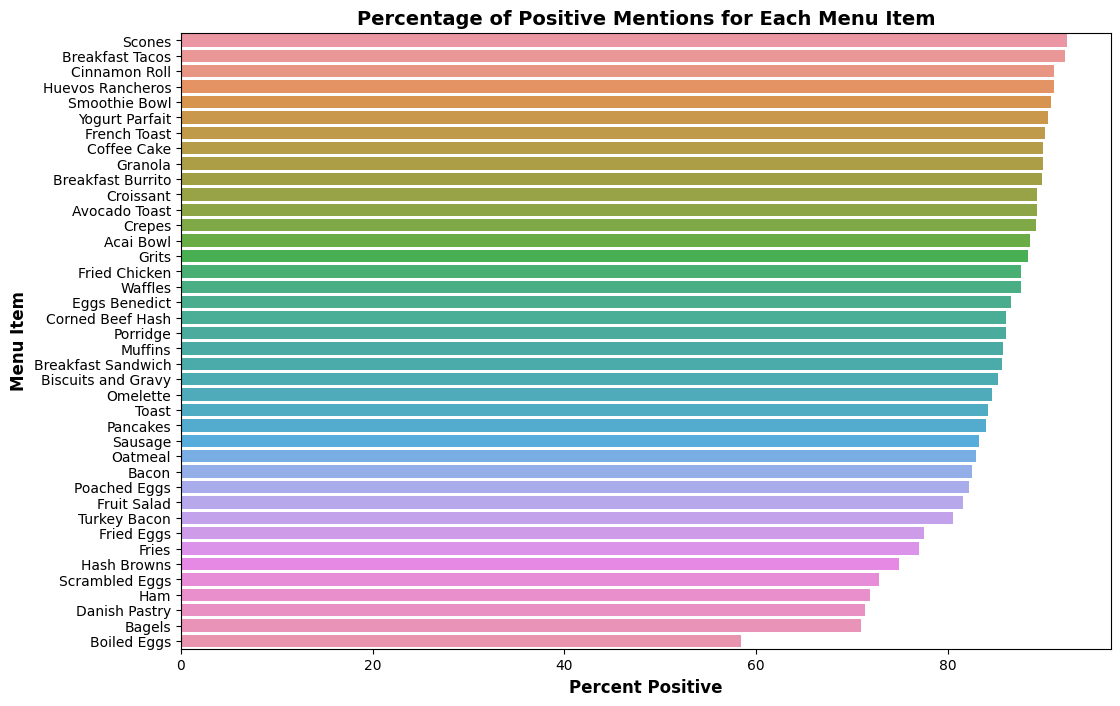

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Percent Positive'
sorted_df = menu_item_stats_df.sort_values('Percent Positive', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Percent Positive', y='Menu Item', data=sorted_df)
plt.title('Percentage of Positive Mentions for Each Menu Item', fontsize=14, fontweight='bold')
plt.xlabel('Percent Positive', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.show()

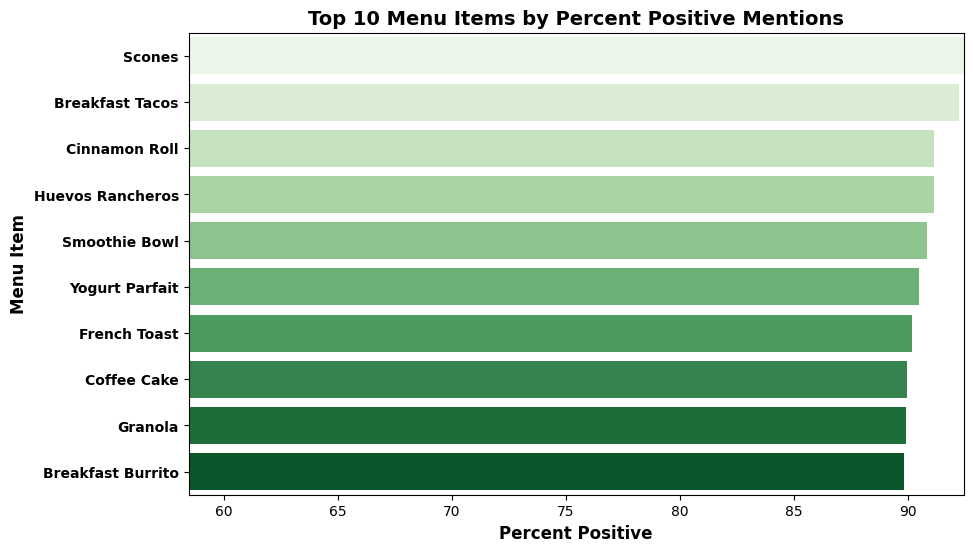

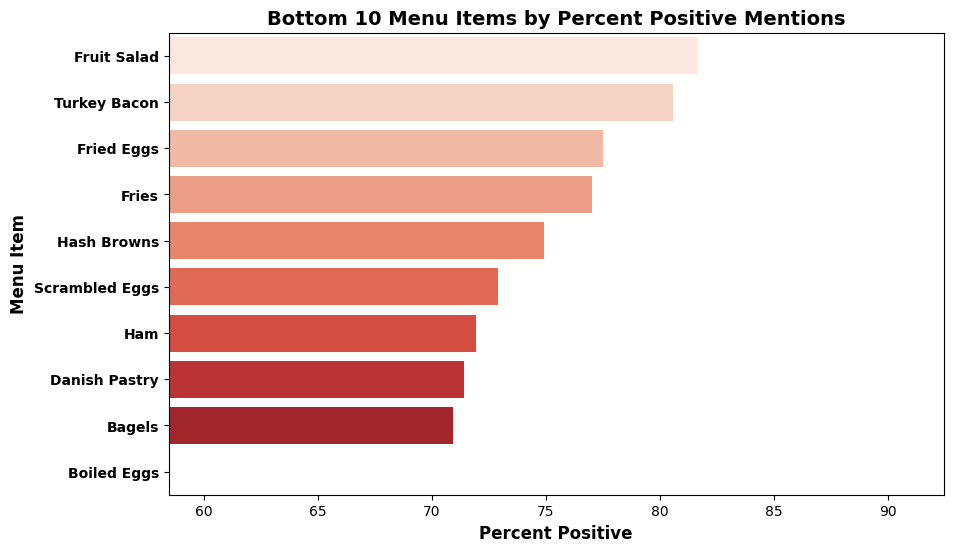

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of items to display
num_items = 10

# Sort the DataFrame by 'Percent Positive'
sorted_df = menu_item_stats_df.sort_values('Percent Positive', ascending=False)

# Split into top and bottom items
top_percent_positive_items = sorted_df.head(num_items)  # Top 10 items
bottom_percent_positive_items = sorted_df.tail(num_items)  # Bottom 10 items

# Determine common x-axis limits for consistency
x_min = min(top_percent_positive_items['Percent Positive'].min(), bottom_percent_positive_items['Percent Positive'].min())
x_max = max(top_percent_positive_items['Percent Positive'].max(), bottom_percent_positive_items['Percent Positive'].max())

# Plot for Top 10 Items by Percent Positive
plt.figure(figsize=(10, 6))
sns.barplot(x='Percent Positive', y='Menu Item', data=top_percent_positive_items, palette='Greens')
plt.title('Top 10 Menu Items by Percent Positive Mentions', fontsize=14, fontweight='bold')
plt.xlabel('Percent Positive', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlim(x_min, x_max)
plt.show()

# Plot for Bottom 10 Items by Percent Positive - Inverted Order
plt.figure(figsize=(10, 6))
# Reverse the order for bottom items
sns.barplot(x='Percent Positive', y='Menu Item', data=bottom_percent_positive_items, palette='Reds')
plt.title('Bottom 10 Menu Items by Percent Positive Mentions', fontsize=14, fontweight='bold')
plt.xlabel('Percent Positive', fontsize=12, fontweight='bold')
plt.ylabel('Menu Item', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlim(x_min, x_max)
plt.show()


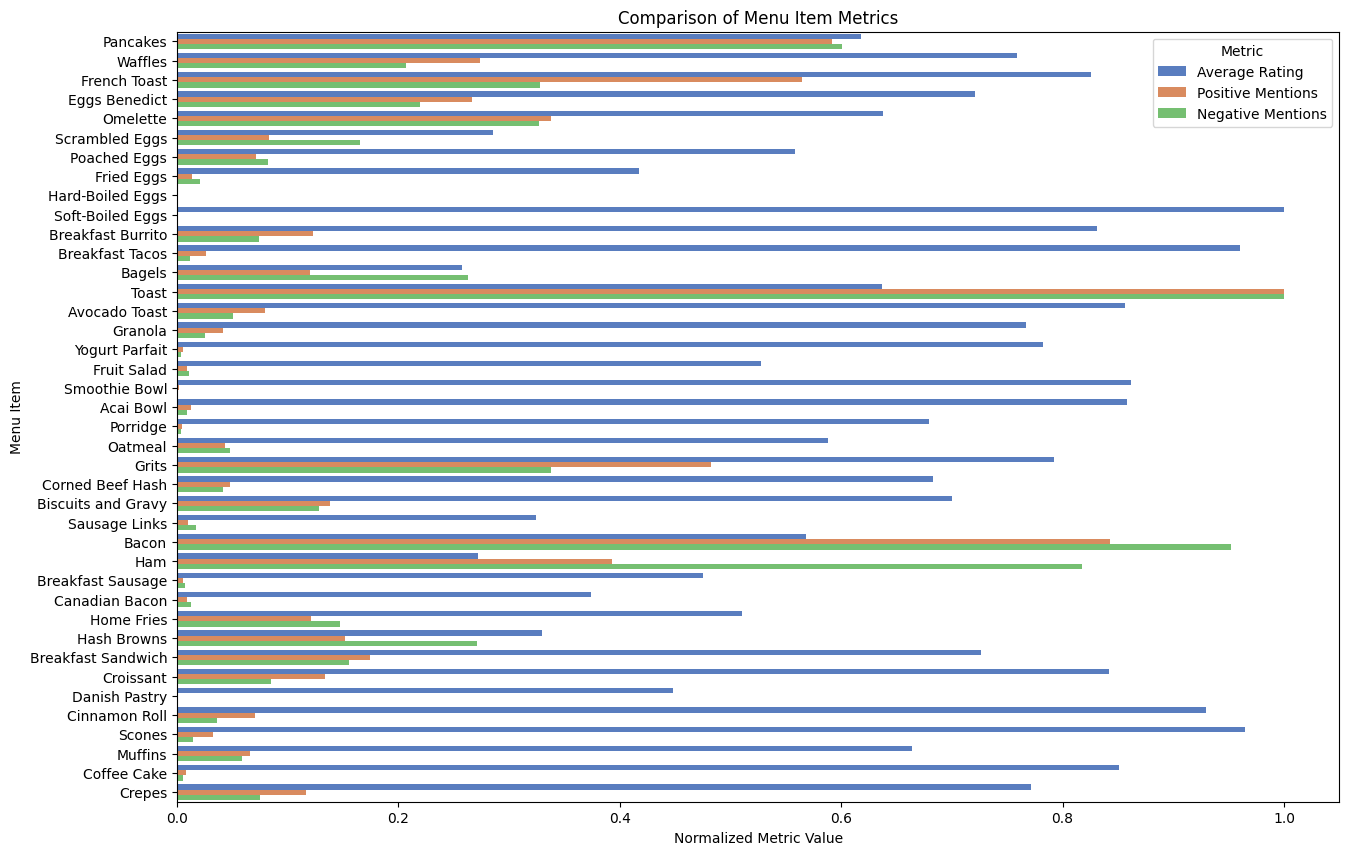

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the columns
scaler = MinMaxScaler()
menu_item_stats_df[['Average Rating', 'Positive Mentions', 'Negative Mentions']] = scaler.fit_transform(menu_item_stats_df[['Average Rating', 'Positive Mentions', 'Negative Mentions']])

# Melt the DataFrame for plotting
melted_df = menu_item_stats_df.melt(id_vars='Menu Item', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Value', y='Menu Item', hue='Metric', data=melted_df, palette='muted')
plt.title('Comparison of Menu Item Metrics')
plt.xlabel('Normalized Metric Value')
plt.ylabel('Menu Item')
plt.legend(title='Metric')
plt.show()

In [39]:
df_filtered['hours']

12        {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...
47        {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...
85        {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...
206       {'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...
235       {'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...
                                ...                        
150228    {'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...
150232    {'Monday': '0:0-0:0', 'Tuesday': '7:0-14:30', ...
150248    {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...
150254    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
150271    {'Monday': '7:30-14:30', 'Tuesday': '7:30-14:3...
Name: hours, Length: 6265, dtype: object

In [42]:
def calculate_total_weekly_hours(hours_dict):
    # If hours_dict is None, return 0
    if hours_dict is None:
        return 0

    total_hours = 0
    for day, hours in hours_dict.items():
        if hours != '0:0-0:0':  # Assuming '0:0-0:0' means closed
            open_time, close_time = hours.split('-')
            open_hour, open_min = map(int, open_time.split(':'))
            close_hour, close_min = map(int, close_time.split(':'))
            daily_hours = (close_hour - open_hour) + (close_min - open_min)/60
            total_hours += daily_hours
    return total_hours

# Apply the function to the 'hours' column
df_filtered['total_weekly_hours'] = df_filtered['hours'].apply(calculate_total_weekly_hours)

# Calculate average daily hours and days open per week
df_filtered['average_daily_hours'] = df_filtered['total_weekly_hours'] / 7
df_filtered['days_open_per_week'] = df_filtered['hours'].apply(lambda x: 0 if x is None else sum(1 for day, hours in x.items() if hours != '0:0-0:0'))

# Now you can proceed with creating visualizations using these new columns


In [6]:
def calculate_total_weekly_hours(hours_dict):
    if hours_dict is None:
        return 0

    total_hours = 0
    for day, hours in hours_dict.items():
        if hours and hours != '0:0-0:0':  # Check for valid hours
            open_time, close_time = hours.split('-')
            open_hour, open_min = map(int, open_time.split(':'))
            close_hour, close_min = map(int, close_time.split(':'))

            # Adjust for closing times past midnight
            if close_hour < open_hour or (close_hour == open_hour and close_min < open_min):
                close_hour += 24

            daily_hours = (close_hour - open_hour) + (close_min - open_min)/60
            total_hours += daily_hours

    return total_hours

# Apply the function to the 'hours' column
df_filtered['total_weekly_hours'] = df_filtered['hours'].apply(calculate_total_weekly_hours)
df_filtered['average_daily_hours'] = df_filtered['total_weekly_hours'] / 7

In [9]:
def calculate_days_open_per_week(hours_dict):
    if hours_dict is None:
        return 0

    days_open = 0
    for day, hours in hours_dict.items():
        if hours and hours != '0:0-0:0':  # Check for valid hours
            days_open += 1

    return days_open

# Apply the function to the 'hours' column
df_filtered['days_open_per_week'] = df_filtered['hours'].apply(calculate_days_open_per_week)

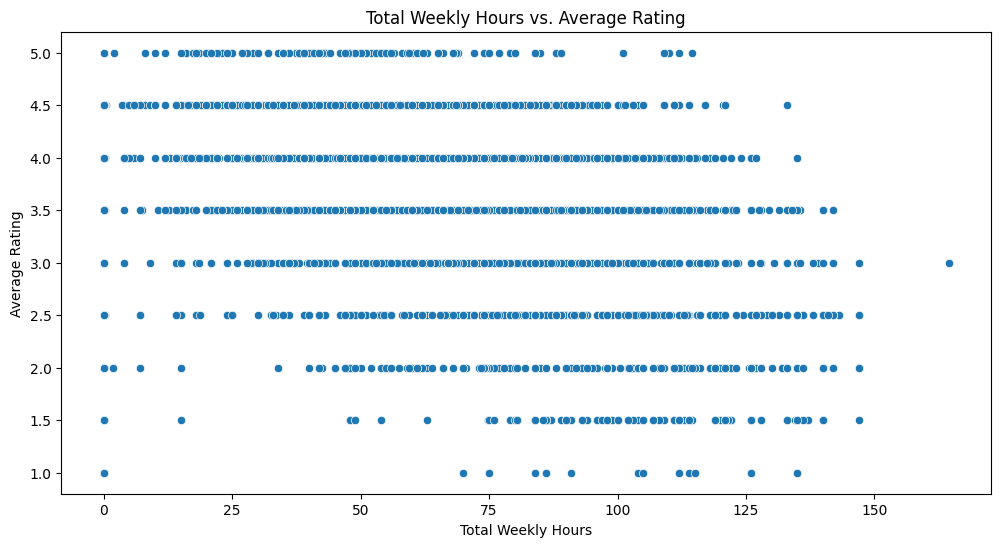

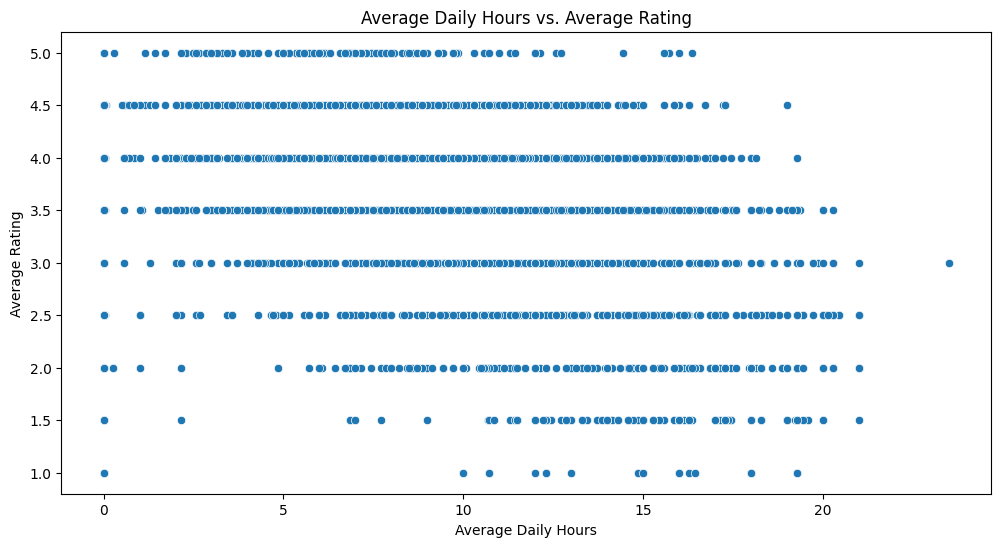

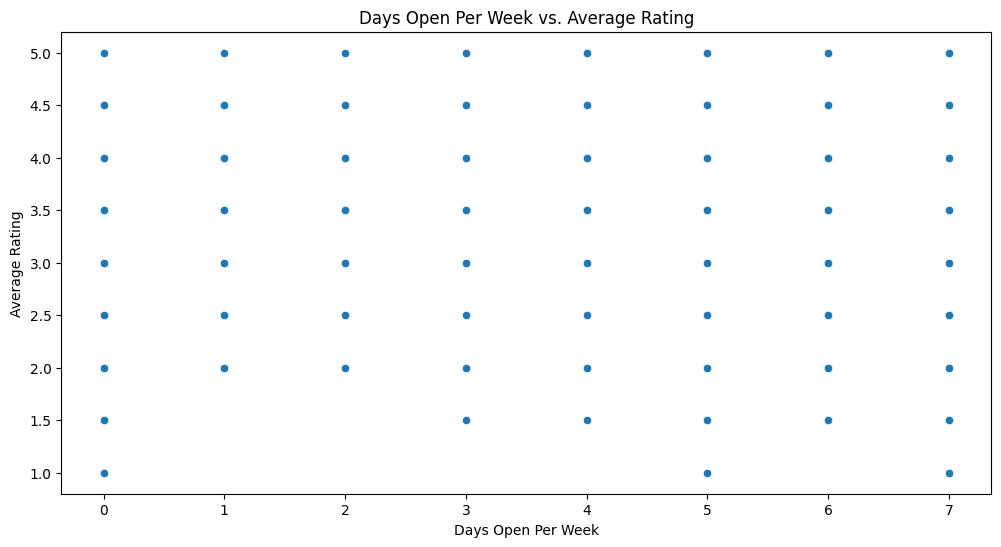

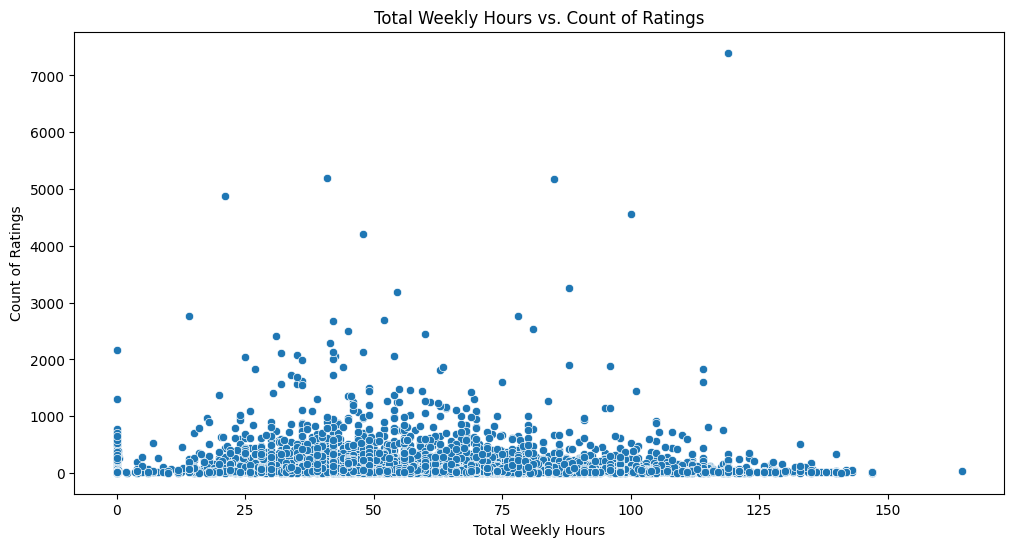

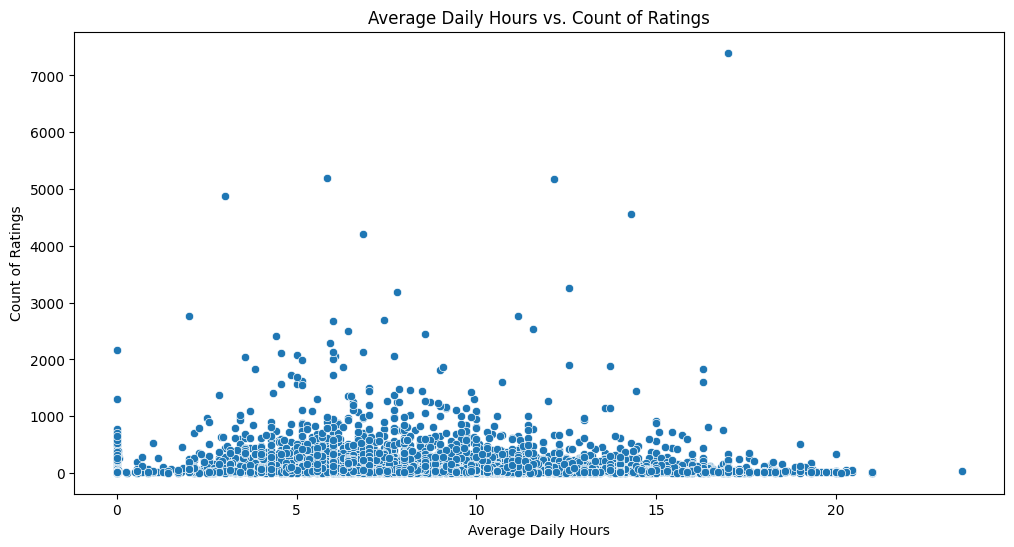

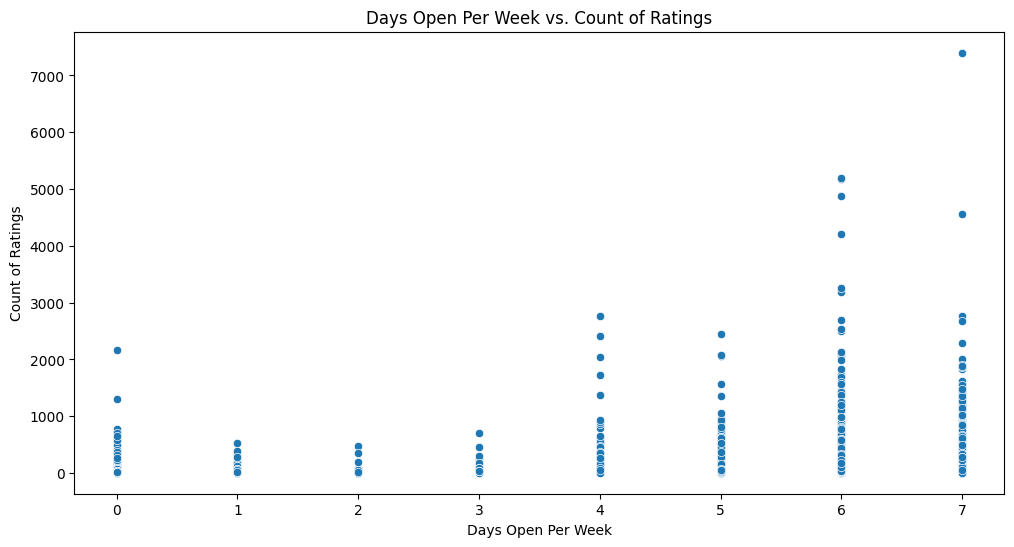

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Total Weekly Hours vs. Average Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_weekly_hours', y='stars', data=df_filtered)
plt.title('Total Weekly Hours vs. Average Rating')
plt.xlabel('Total Weekly Hours')
plt.ylabel('Average Rating')
plt.show()

# Scatter plot for Average Daily Hours vs. Average Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_daily_hours', y='stars', data=df_filtered)
plt.title('Average Daily Hours vs. Average Rating')
plt.xlabel('Average Daily Hours')
plt.ylabel('Average Rating')
plt.show()

# Scatter plot for Days Open Per Week vs. Average Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_open_per_week', y='stars', data=df_filtered)
plt.title('Days Open Per Week vs. Average Rating')
plt.xlabel('Days Open Per Week')
plt.ylabel('Average Rating')
plt.show()

# Scatter plot for Each Hours Metric vs. Count of Ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_weekly_hours', y='review_count', data=df_filtered)
plt.title('Total Weekly Hours vs. Count of Ratings')
plt.xlabel('Total Weekly Hours')
plt.ylabel('Count of Ratings')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_daily_hours', y='review_count', data=df_filtered)
plt.title('Average Daily Hours vs. Count of Ratings')
plt.xlabel('Average Daily Hours')
plt.ylabel('Count of Ratings')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_open_per_week', y='review_count', data=df_filtered)
plt.title('Days Open Per Week vs. Count of Ratings')
plt.xlabel('Days Open Per Week')
plt.ylabel('Count of Ratings')
plt.show()

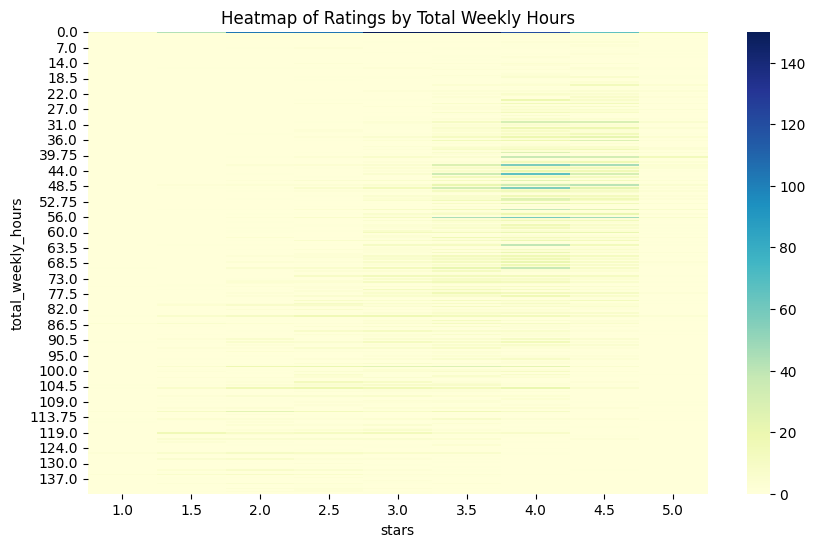

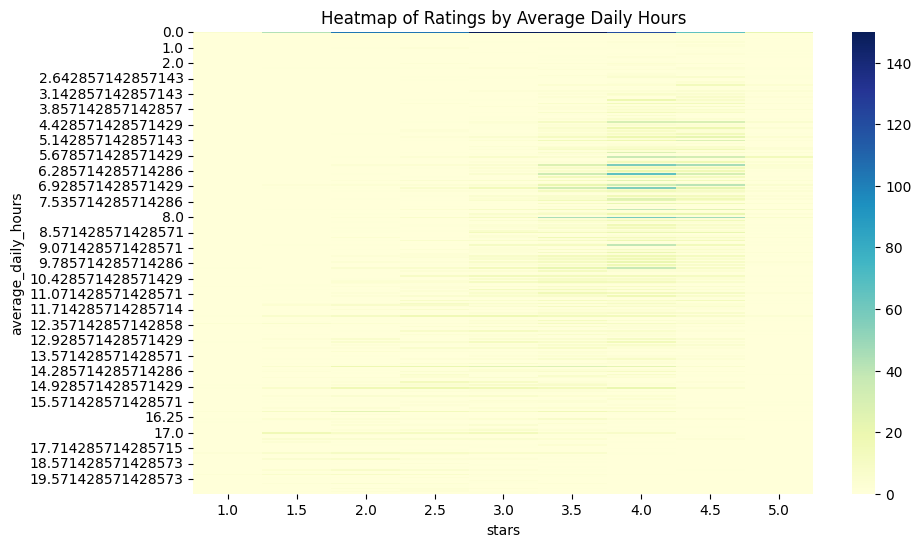

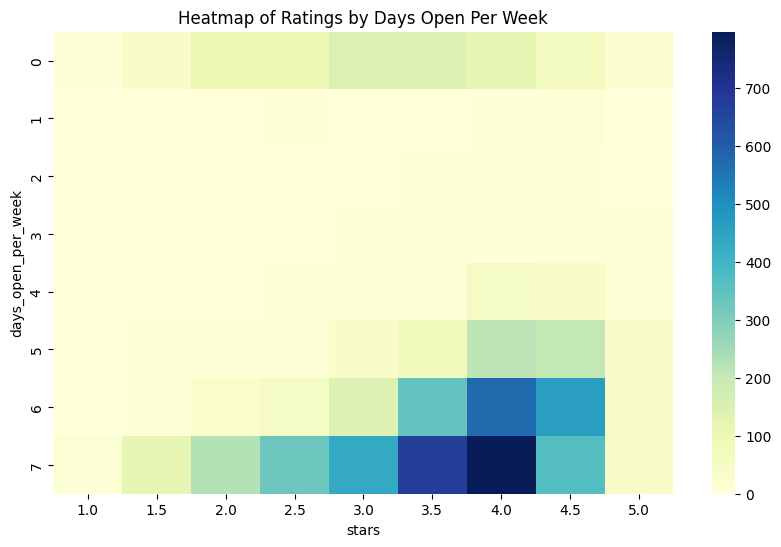

In [11]:
# Function to create heatmap
def heatmap_plot(df, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    heatmap_data = pd.crosstab(df[x_col], df[y_col])
    sns.heatmap(heatmap_data, cmap='YlGnBu')
    plt.title(title)
    plt.show()

# Create heatmaps
heatmap_plot(df_filtered, 'total_weekly_hours', 'stars', 'Heatmap of Ratings by Total Weekly Hours')
heatmap_plot(df_filtered, 'average_daily_hours', 'stars', 'Heatmap of Ratings by Average Daily Hours')
heatmap_plot(df_filtered, 'days_open_per_week', 'stars', 'Heatmap of Ratings by Days Open Per Week')

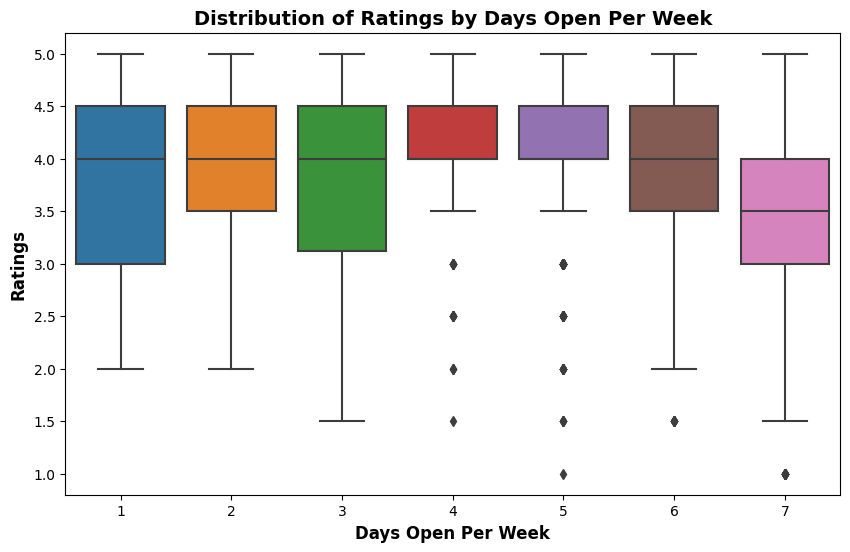

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Revised function to create box plots
def box_plot(df, x_col, y_col, title, x_label, y_label):
    # Exclude entries with 0 days open per week
    df = df[df[x_col] > 0]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(title, fontsize=14, fontweight='bold')  # Increase font size and bold title
    plt.xlabel(x_label, fontsize=12, fontweight='bold')  # Increase font size for x-axis label
    plt.ylabel(y_label, fontsize=12, fontweight='bold')  # Increase font size for y-axis label

    plt.show()

# Create box plot
box_plot(df_filtered, 'days_open_per_week', 'stars', 'Distribution of Ratings by Days Open Per Week', 'Days Open Per Week', 'Ratings')


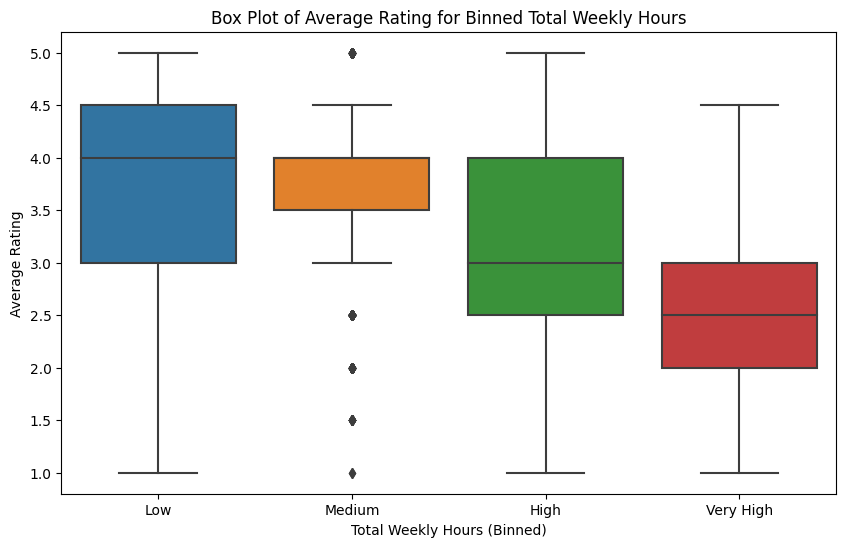

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Binning the 'total_weekly_hours' into, for example, 4 bins
df_filtered['total_weekly_hours_binned'] = pd.cut(df_filtered['total_weekly_hours'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Box plot for Average Rating vs Binned Total Weekly Hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_weekly_hours_binned', y='stars', data=df_filtered)
plt.title('Box Plot of Average Rating for Binned Total Weekly Hours')
plt.xlabel('Total Weekly Hours (Binned)')
plt.ylabel('Average Rating')
plt.show()

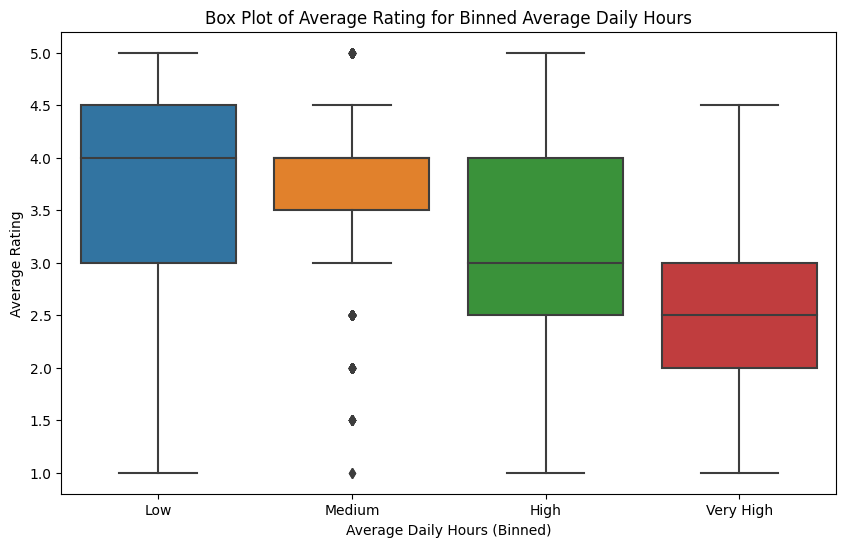

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Binning the 'total_weekly_hours' into, for example, 4 bins
df_filtered['average_daily_hours_binned'] = pd.cut(df_filtered['average_daily_hours'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Box plot for Average Rating vs Binned Total Weekly Hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='average_daily_hours_binned', y='stars', data=df_filtered)
plt.title('Box Plot of Average Rating for Binned Average Daily Hours')
plt.xlabel('Average Daily Hours (Binned)')
plt.ylabel('Average Rating')
plt.show()

In [23]:
import pandas as pd
import numpy as np

# Define a function to parse hours and create a weekly schedule
def parse_hours(hours_dict, score):
    # Create an empty weekly schedule
    weekly_schedule = np.zeros((24, 7))  # 24 hours, 7 days

    if hours_dict:
        for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
            if day in hours_dict:
                hours = hours_dict[day]
                if hours != '0:0-0:0':
                    open_time, close_time = hours.split('-')
                    open_hour = int(open_time.split(':')[0])
                    close_hour = int(close_time.split(':')[0])

                    # Adjust for closing times past midnight
                    if close_hour <= open_hour:
                        close_hour += 24

                    # Mark the hours the business is open with its score
                    for hour in range(open_hour, close_hour):
                        actual_hour = hour if hour < 24 else hour - 24
                        weekly_schedule[actual_hour, i] = score

    return weekly_schedule

# Apply the function to each row and sum up the schedules
total_schedule = np.zeros((24, 7))  # 24 hours, 7 days
count_schedule = np.zeros((24, 7))  # To count the number of businesses open

for index, row in df_filtered.iterrows():
    hours = row['hours']
    score = row['stars']
    schedule = parse_hours(hours, score)

    # Add the schedule to the total and increment the count
    total_schedule += schedule
    count_schedule += (schedule != 0)

# Calculate the average score for each time slot
average_schedule = np.divide(total_schedule, count_schedule, out=np.zeros_like(total_schedule), where=count_schedule != 0)

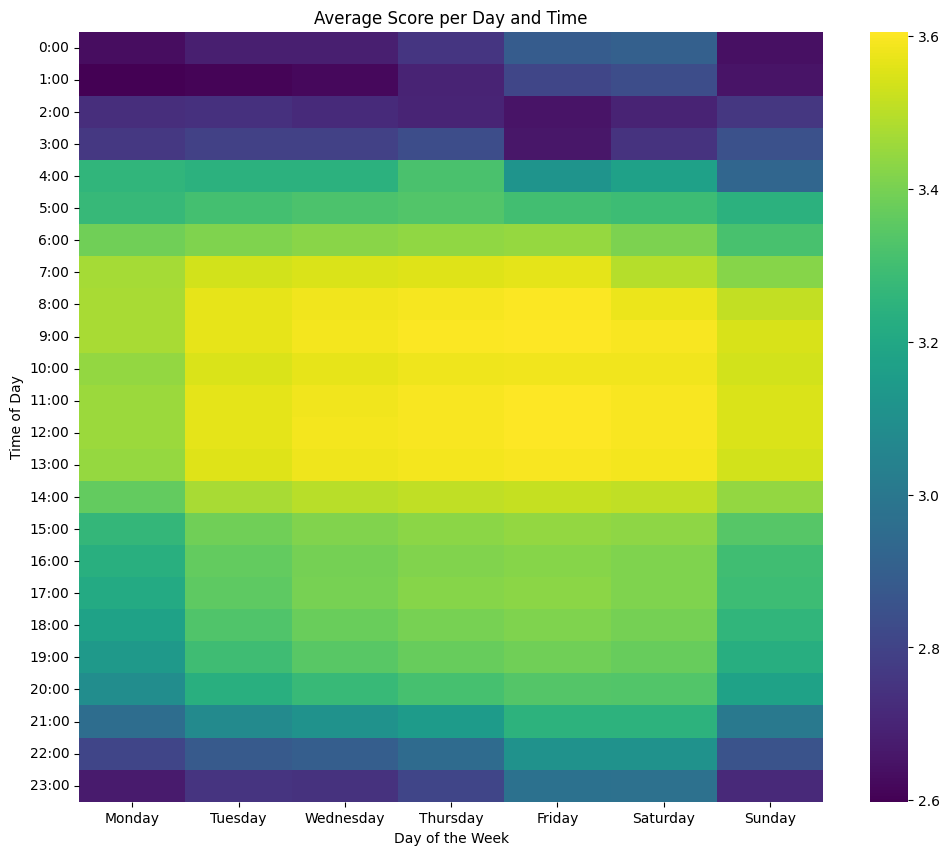

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define days and hours for plotting
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = [f'{hour}:00' for hour in range(24)]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(average_schedule, xticklabels=days, yticklabels=hours, cmap='viridis')
plt.title('Average Score per Day and Time')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.show()

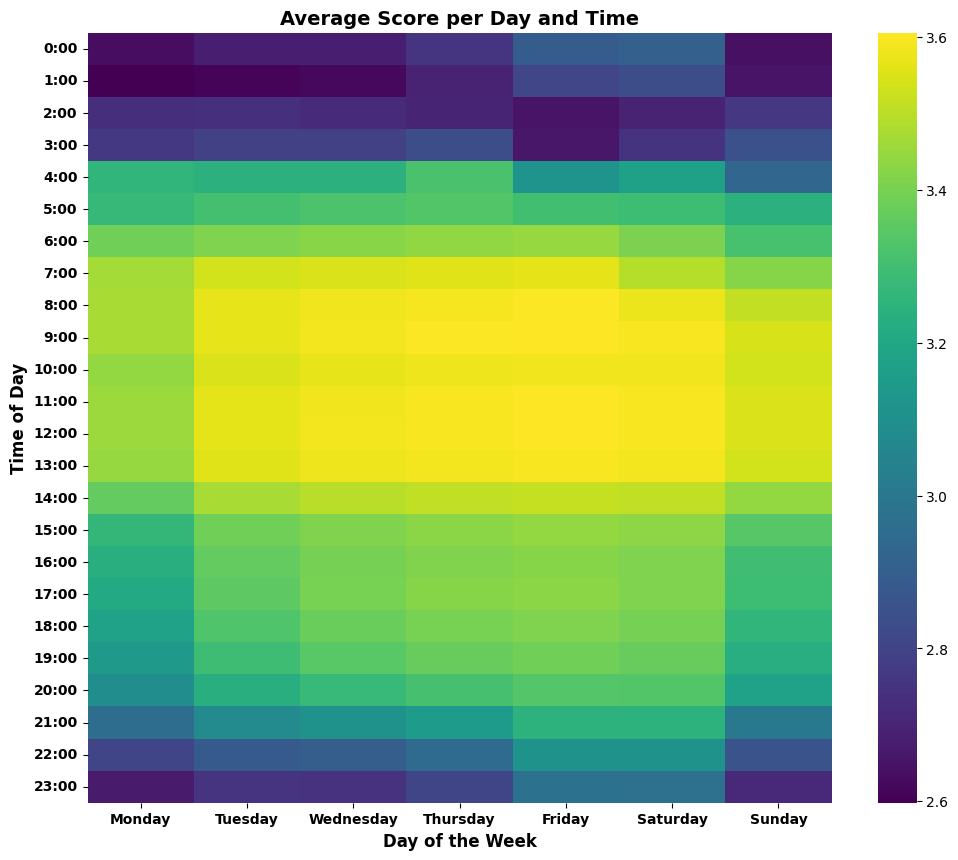

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colors
start_color = 'blue'  # Replace with your start color
end_color = 'green'   # Replace with your end color

# Create a color palette
custom_palette = LinearSegmentedColormap.from_list('custom_palette', [start_color, end_color])

# Define days and hours for plotting
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = [f'{hour}:00' for hour in range(24)]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(average_schedule, xticklabels=days, yticklabels=hours, cmap='viridis')

# Enlarge and embolden labels
plt.title('Average Score per Day and Time', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12, fontweight='bold')
plt.ylabel('Time of Day', fontsize=12, fontweight='bold')

# Adjust tick labels
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.show()

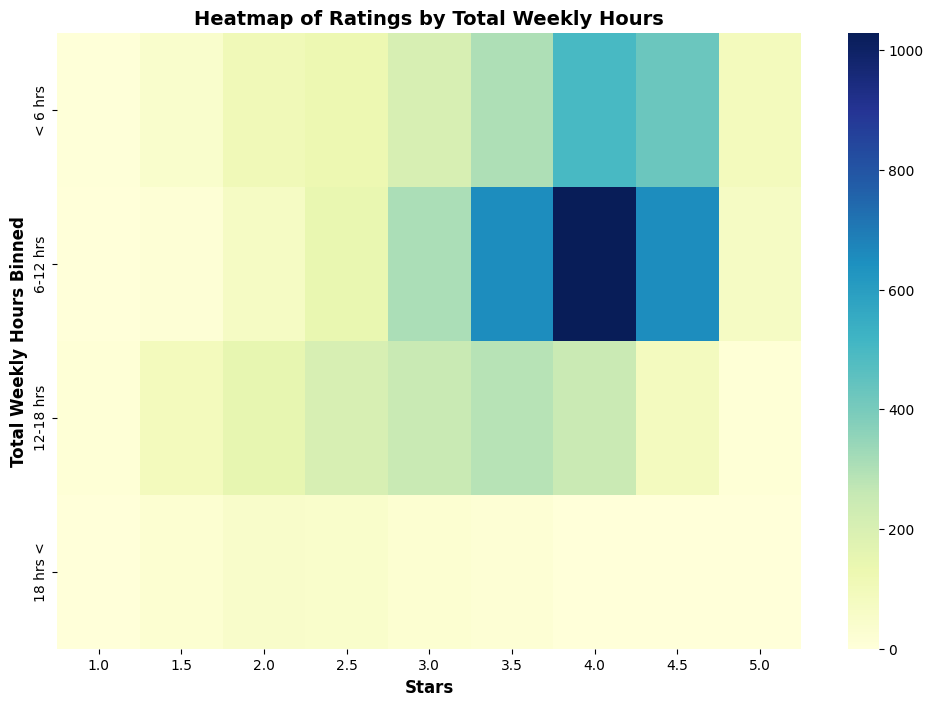

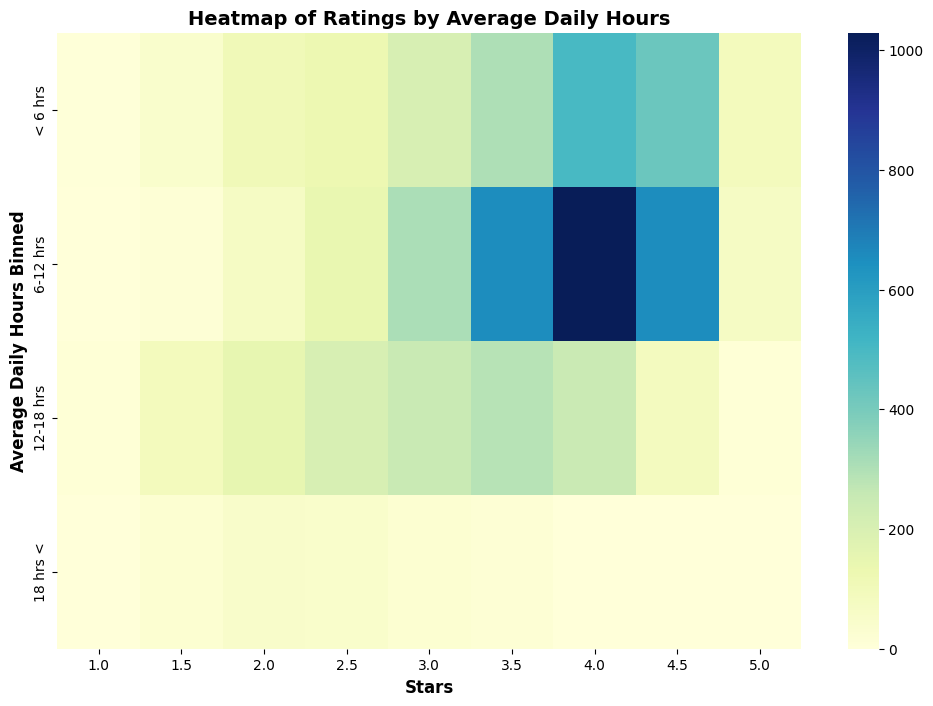

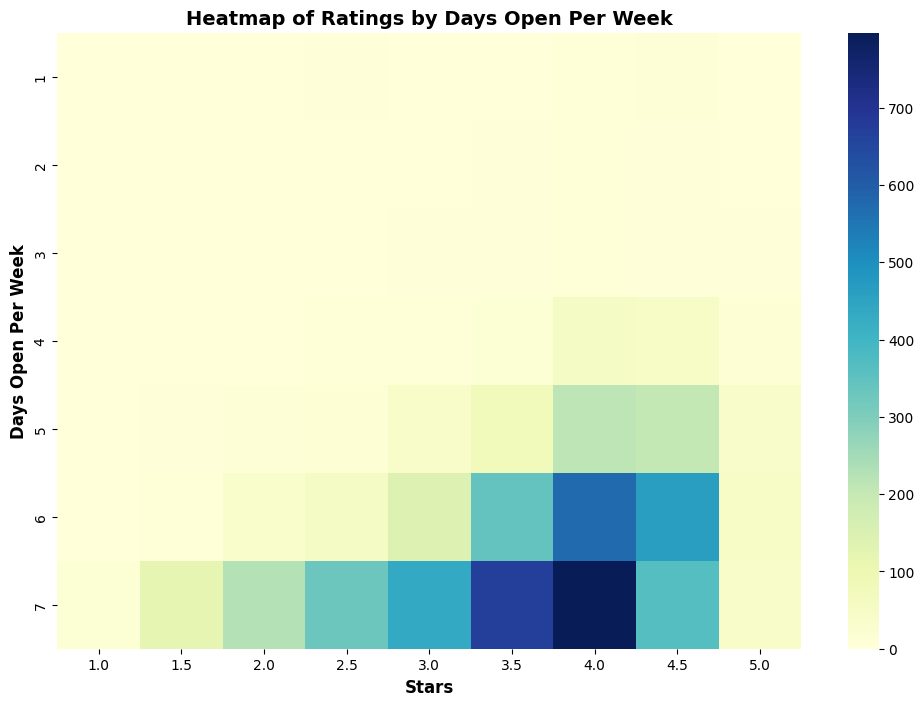

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame and it has been appropriately processed

# Revised function to create heatmap with reader-friendly title
def heatmap_plot(df, x_col, y_col, title):
    plt.figure(figsize=(12, 8))
    heatmap_data = pd.crosstab(df[x_col], df[y_col])
    ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)  # Turn off annotations
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(y_col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    plt.ylabel(x_col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    plt.show()

# Create heatmaps with binned hours
heatmap_plot(df_filtered, 'total_weekly_hours_binned', 'stars', 'Heatmap of Ratings by Total Weekly Hours')
heatmap_plot(df_filtered, 'average_daily_hours_binned', 'stars', 'Heatmap of Ratings by Average Daily Hours')

# For 'days_open_per_week', exclude '0' days
df_filtered_filtered = df_filtered[df_filtered['days_open_per_week'] > 0]
heatmap_plot(df_filtered_filtered, 'days_open_per_week', 'stars', 'Heatmap of Ratings by Days Open Per Week')


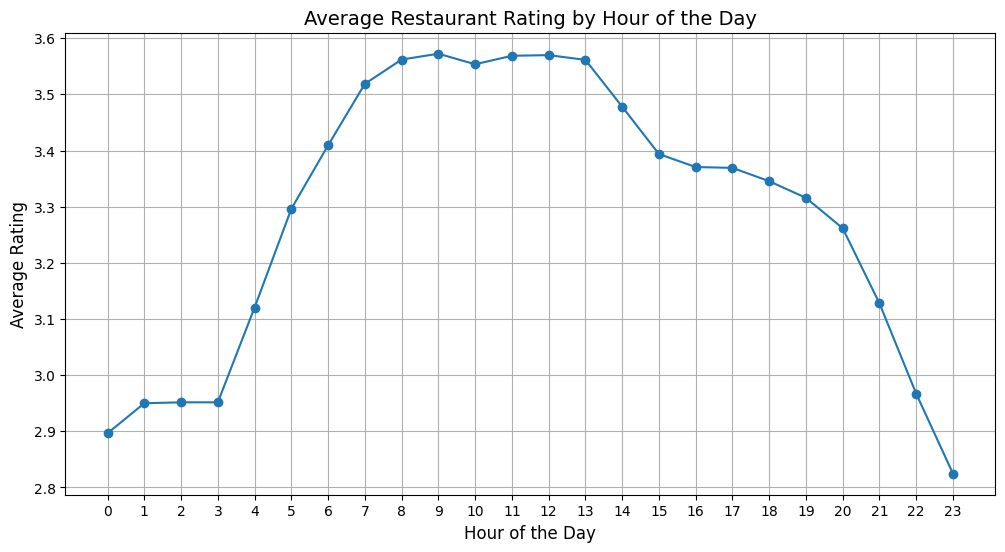

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Initialize a dictionary to hold ratings for each hour
hourly_ratings = {hour: [] for hour in range(24)}

# Function to parse the hours and associate them with the rating
def parse_hours_and_rating(row):
    hours_data = row['hours']
    rating = row['stars']
    if hours_data and isinstance(hours_data, dict):
        for day, hours in hours_data.items():
            if hours != '0:0-0:0':
                open_time, close_time = hours.split('-')
                open_hour = int(open_time.split(':')[0])
                close_hour = int(close_time.split(':')[0])

                # Adjust for closing times past midnight
                if close_hour <= open_hour:
                    close_hour += 24

                # Update the hourly_ratings dictionary
                for hour in range(open_hour, min(close_hour, 24)):
                    hourly_ratings[hour].append(rating)

# Apply the function to each row in the DataFrame
for _, row in df_filtered.iterrows():
    parse_hours_and_rating(row)

# Calculate the average rating for each hour
average_ratings_per_hour = {hour: sum(ratings) / len(ratings) if ratings else None for hour, ratings in hourly_ratings.items()}

# Filter out hours with no data
filtered_hours = [hour for hour in average_ratings_per_hour if average_ratings_per_hour[hour] is not None]
filtered_avg_ratings = [average_ratings_per_hour[hour] for hour in filtered_hours]

# Creating the line plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_hours, filtered_avg_ratings, marker='o')
plt.title('Average Restaurant Rating by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [15]:
from scipy.stats import pearsonr

# Convert the hourly ratings data into a suitable format for correlation analysis
hours = list(range(24))
avg_ratings = [average_ratings_per_hour[hour] for hour in hours if average_ratings_per_hour[hour] is not None]

# Perform Pearson's correlation
correlation_coefficient, p_value = pearsonr(hours, avg_ratings)

print(f"Correlation Coefficient: {correlation_coefficient}, P-value: {p_value}")

Correlation Coefficient: 0.09128202683952685, P-value: 0.6714172293272416


In [6]:
df_filtered.head()

business_id                   name                address  \
12   il_Ro8jwPlHresjw9EGmBg                Denny's           8901 US 31 S   
47   lk9IwjZXqUMqqOhM774DtQ       Caviar & Bananas          2031 Broadway   
85   IDtLPgUrqorrpqSLdfMhZQ   Helena Avenue Bakery  131 Anacapa St, Ste C   
206  IYlUaKC9nICjiWdk-ShPlg             Bub's Cafe          220 2nd St SW   
235  bTve2mwLk5Zc01vRKqc2KQ  Red Hook Coffee & Tea           765 S 4th St   

              city state postal_code   latitude   longitude  stars  \
12    Indianapolis    IN       46227  39.637133  -86.127217    2.5   
47       Nashville    TN       37203  36.148371  -86.798895    3.5   
85   Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
206         Carmel    IN       46032  39.976614  -86.130124    4.0   
235   Philadelphia    PA       19147  39.938552  -75.149636    4.5   

     review_count  is_open                                         attributes  \
12             28        1  {'RestaurantsReservations': 'False', 'Restaura...   
47            159        0  {'RestaurantsTakeOut': 'True', 'RestaurantsRes...   
85            389        1  {'RestaurantsTakeOut': 'True', 'NoiseLevel': '...   
206           175        0  {'RestaurantsReservations': 'False', 'Business...   
235           183        1  {'BikeParking': 'True', 'OutdoorSeating': 'Tru...   

                                            categories  \
12   American (Traditional), Restaurants, Diners, B...   
47   Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...   
85   Food, Restaurants, Salad, Coffee & Tea, Breakf...   
206                    Restaurants, Breakfast & Brunch   
235  Restaurants, Breakfast & Brunch, Vegan, Bagels...   

                                                 hours  
12   {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...  
47   {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  
85   {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...  
206  {'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...  
235  {'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...

In [7]:
ind_df = df_filtered[df_filtered['city'] == 'Indianapolis']
ind_df.head()

business_id                         name  \
12    il_Ro8jwPlHresjw9EGmBg                      Denny's   
636   HCbJPXWXvwN-C7XfmVy3gA  Granite City Food & Brewery   
770   2DsplH_vy4GCcEnVpn0AbA                  Cafe Olivia   
909   Iuir7lUtx-LMhYtStwyf3Q      Another Broken Egg Cafe   
1838  zwfN21b6gN2XGjNG6MYNzQ        Wolfgang Puck Express   

                         address          city state postal_code   latitude  \
12                  8901 US 31 S  Indianapolis    IN       46227  39.637133   
636   49 W Maryland St, Ste B03A  Indianapolis    IN       46204  39.766420   
770              222 E Market St  Indianapolis    IN       46204  39.768973   
909     5025 E 82nd St, Ste 2500  Indianapolis    IN       46250  39.904151   
1838       2500 S High School Rd  Indianapolis    IN       46241  39.716693   

      longitude  stars  review_count  is_open  \
12   -86.127217    2.5            28        1   
636  -86.159245    3.5           258        0   
770  -86.153309    4.5            34        1   
909  -86.083809    4.0            26        1   
1838 -86.297826    2.0            70        0   

                                             attributes  \
12    {'RestaurantsReservations': 'False', 'Restaura...   
636   {'RestaurantsGoodForGroups': 'True', 'Ambience...   
770   {'BikeParking': 'True', 'RestaurantsAttire': '...   
909   {'WheelchairAccessible': 'True', 'RestaurantsG...   
1838  {'RestaurantsAttire': 'u'casual'', 'NoiseLevel...   

                                             categories  \
12    American (Traditional), Restaurants, Diners, B...   
636   Desserts, Breweries, Breakfast & Brunch, Resta...   
770   Sandwiches, Breakfast & Brunch, Food Stands, I...   
909   American (Traditional), Restaurants, Breakfast...   
1838  Breakfast & Brunch, American (New), Salad, Res...   

                                                  hours  
12    {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...  
636   {'Monday': '11:0-18:0', 'Tuesday': '11:0-0:0',...  
770   {'Monday': '10:45-14:0', 'Tuesday': '10:45-14:...  
909   {'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...  
1838                                               None

In [8]:
ind_df.shape

(339, 14)

In [9]:
import pandas as pd
import json

# Path to the reviews JSON file
reviews_file_path = 'review.json'

# Get the list of business IDs from df_filtered
business_ids = set(ind_df['business_id'])

# Initialize an empty list to store the matching review records
filtered_reviews = []

# Open the reviews file with UTF-8 encoding and read line by line
with open(reviews_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        review = json.loads(line)
        if review['business_id'] in business_ids:
            filtered_reviews.append(review)

# Convert the list of reviews to a DataFrame
reviews_df = pd.DataFrame(filtered_reviews)

# Display the first few rows of the DataFrame
print(reviews_df.head())

                review_id                 user_id             business_id  \
0  l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A  EQ-TZ2eeD_E0BHuvoaeG5Q   
1  940tqxFO4Pwg_KMg4Y4Z5g  O6wkgoJqU7KMjleSlCDGaA  EQ-TZ2eeD_E0BHuvoaeG5Q   
2  juzhoSPzFupje-RYJ4VPpQ  SXfDfVltyy6uI4vDgzDlvw  9V0LMtO1riRw9-pUuG4NFg   
3  aJBV9CklyQQ0mH-tKg_oGw  3x69a8OGyReKirigOk8Nww  WW8WN8J89M3U4z1xP4MhnA   
4  DIRohs5uJ5kqBtSwZDZ1_w  JTbWKeaQLH0w2TWCiRjq4g  F_wIC6i5y4zdQyp99R7PdQ   

   stars  useful  funny  cool  \
0    4.0       0      0     0   
1    5.0       2      0     1   
2    3.0       0      0     0   
3    4.0       1      0     0   
4    4.0       1      0     1   

                                                text                 date  
0  Locals recommended Milktooth, and it's an amaz...  2015-08-19 14:31:45  
1  Milktooth is the place to go if you want a goo...  2018-01-10 01:48:58  
2  In short, the food was decently good, but comp...  2014-06-28 18:40:49  
3  They have great prices if you o

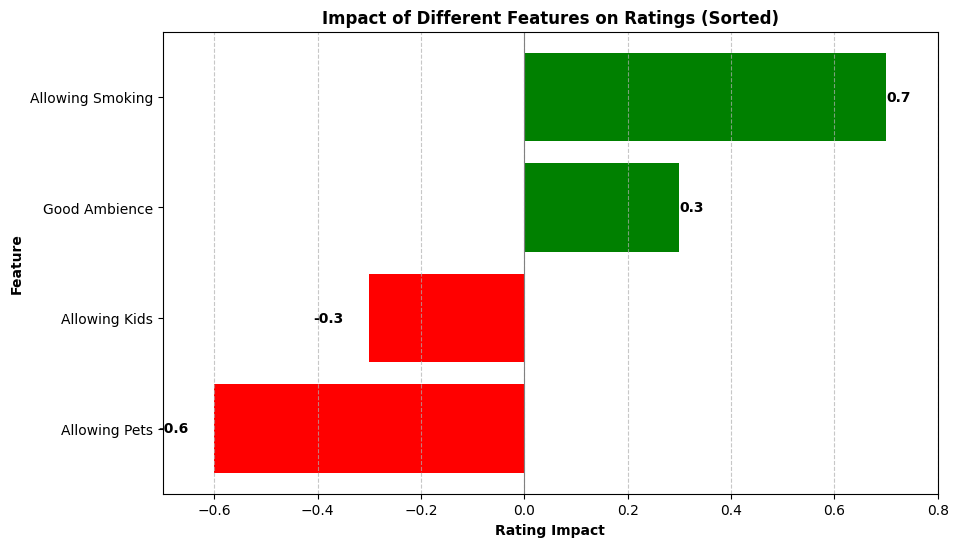

In [12]:
# Adjusting the x-axis minimum to -0.7
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Feature'], df_sorted['Rating_Impact'], 
                color=['red' if x < 0 else 'green' for x in df_sorted['Rating_Impact']])

# Adding bold value labels to each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 0.05
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center', 
             ha='right' if width < 0 else 'left', fontweight='bold')

# Styling
plt.xlabel('Rating Impact', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Impact of Different Features on Ratings (Sorted)', fontweight='bold')
plt.axvline(0, color='grey', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Setting x-axis limits
plt.xlim(-0.7, max(df_sorted['Rating_Impact']) + 0.1)

# Show plot
plt.show()


In [15]:
# Original data
data = {
    "Food": ["Breakfast Tacos", "Coffee Cake", "Danish", "Fries", "Hash Browns", "Muffins", "Turkey Bacon"],
    "NEGATIVE": [3.6, 3.88, 3.9, 3.5, 3.75, 4.2, 3.63],
    "POSITIVE": [4.25, 4.22, 3.6, 3.87, 4.0, 4.0, 3.95]
}

# Convert to DataFrame
df_original = pd.DataFrame(data)

# Calculating Rating Impact
df_original['Rating_Impact'] = df_original['POSITIVE'] - df_original['NEGATIVE']

# New DataFrame with desired structure
df_new_structure = df_original[['Food', 'Rating_Impact']]
df_new_structure
df_sorted = df_new_structure.sort_values(by='Rating_Impact')

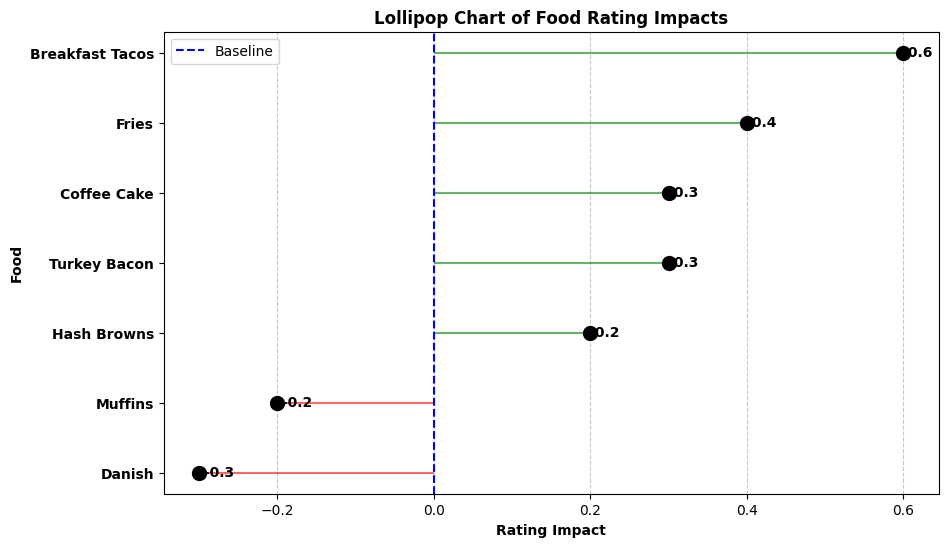

In [16]:

# Rounding the rating impacts to 1 decimal place
df_sorted['Rating_Impact'] = df_sorted['Rating_Impact'].round(1)

# Creating the adjusted lollipop plot
plt.figure(figsize=(10, 6))
plt.hlines(y=df_sorted['Food'], xmin=0, xmax=df_sorted['Rating_Impact'], color=df_sorted['Rating_Impact'].apply(lambda x: 'green' if x >= 0 else 'red'), alpha=0.6)
plt.plot(df_sorted['Rating_Impact'], df_sorted['Food'], "o", markersize=10, color='black')

# Adding adjusted value labels
for impact, food in zip(df_sorted['Rating_Impact'], df_sorted['Food']):
    plt.text(impact, food, f' {impact:.1f}', color='black', va='center', fontweight='bold', fontsize=10)

# Adding a dashed blue line at x=0
plt.axvline(x=0, color='blue', linestyle='--', label='Baseline')

# Styling adjustments
plt.xlabel('Rating Impact', fontweight='bold')
plt.ylabel('Food', fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontweight='bold')
plt.title('Lollipop Chart of Food Rating Impacts', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()

In [17]:
import pandas as pd
import numpy as np

# Define a function to parse hours and create a weekly schedule
def parse_hours(hours_dict, score):
    # Create an empty weekly schedule
    weekly_schedule = np.zeros((24, 7))  # 24 hours, 7 days

    if hours_dict:
        for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
            if day in hours_dict:
                hours = hours_dict[day]
                if hours != '0:0-0:0':
                    open_time, close_time = hours.split('-')
                    open_hour = int(open_time.split(':')[0])
                    close_hour = int(close_time.split(':')[0])

                    # Adjust for closing times past midnight
                    if close_hour <= open_hour:
                        close_hour += 24

                    # Mark the hours the business is open with its score
                    for hour in range(open_hour, close_hour):
                        actual_hour = hour if hour < 24 else hour - 24
                        weekly_schedule[actual_hour, i] = score

    return weekly_schedule

# Apply the function to each row and sum up the schedules
total_schedule = np.zeros((24, 7))  # 24 hours, 7 days
count_schedule = np.zeros((24, 7))  # To count the number of businesses open

for index, row in df_filtered.iterrows():
    hours = row['hours']
    score = row['stars']
    schedule = parse_hours(hours, score)

    # Add the schedule to the total and increment the count
    total_schedule += schedule
    count_schedule += (schedule != 0)

# Calculate the average score for each time slot
average_schedule = np.divide(total_schedule, count_schedule, out=np.zeros_like(total_schedule), where=count_schedule != 0)

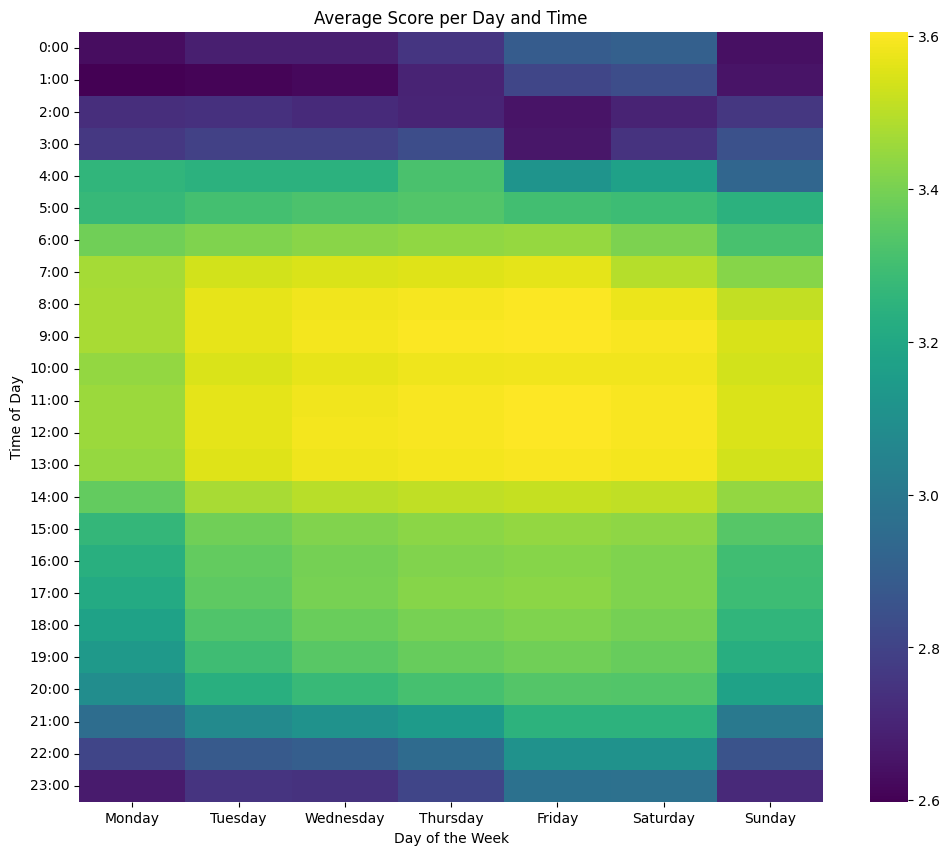

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define days and hours for plotting
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = [f'{hour}:00' for hour in range(24)]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(average_schedule, xticklabels=days, yticklabels=hours, cmap='viridis')
plt.title('Average Score per Day and Time')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.show()

In [19]:
average_schedule

array([[2.63269231, 2.68181818, 2.68231047, 2.75328947, 2.88901869,
        2.9032634 , 2.63953488],
       [2.59810127, 2.60670732, 2.61976048, 2.69444444, 2.80976431,
        2.83110368, 2.65142857],
       [2.72807018, 2.73636364, 2.71929825, 2.69852941, 2.65079365,
        2.69354839, 2.75735294],
       [2.76315789, 2.79411765, 2.79411765, 2.83333333, 2.65957447,
        2.74444444, 2.84848485],
       [3.25806452, 3.24193548, 3.24193548, 3.31818182, 3.11842105,
        3.17142857, 2.92857143],
       [3.27222222, 3.3062201 , 3.31904762, 3.33253589, 3.30188679,
        3.290625  , 3.24      ],
       [3.38643371, 3.41163793, 3.42720971, 3.4378801 , 3.44606543,
        3.40535918, 3.31336088],
       [3.46825765, 3.53797468, 3.5468696 , 3.55707368, 3.56477591,
        3.49509002, 3.42382022],
       [3.47404844, 3.567     , 3.58220503, 3.59156293, 3.59906181,
        3.57562902, 3.51430843],
       [3.47537743, 3.56972698, 3.58896338, 3.5985843 , 3.60555983,
        3.59427521, 3.5